In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 40)

In [4]:
train_df = pd.read_csv("./data/train.csv")

In [5]:
train_df

label      uid  task_id  adv_id  creat_type_cd  adv_prim_id  dev_id  \
0           0  2123472     4469    3403              7          173      52   
1           0  1182150     2926    4168              3          142      36   
2           0  1287174     5382    1250              6          113      60   
3           0  2098119     4772    6623              7          126      19   
4           0  1192969     3690    4486              7          207      17   
...       ...      ...      ...     ...            ...          ...     ...   
627911      0  1655425     3252    2469              7          133      60   
627912      0  1782827     3461    3198              6          107      15   
627913      0  1147302     5338    2658              7          178      17   
627914      0  1134723     5319    5954              7          207      17   
627915      0  1042857     5382    1250              6          113      60   

        inter_type_cd  slot_id  spread_app_id  tags  app_first_class  \
0                   5       21             69    11                4   
1                   5       17             80    41                4   
2                   2       21             78    23                2   
3                   5       16             57    27                4   
4                   5       12             13    37                4   
...               ...      ...            ...   ...              ...   
627911              5       12             34    13                2   
627912              5       18             46    39                4   
627913              5       12             70    39                4   
627914              5       12             13    37                4   
627915              2       21             78    23                2   

        app_second_class  age  city  city_rank  device_name  device_size  \
0                     20    6   121          3           82          117   
1                     26    5   333          5           56          141   
2                     23    3   333          5          103          141   
3                     13    5   149          5          102          141   
4                     21    4   160          3           76          156   
...                  ...  ...   ...        ...          ...          ...   
627911                25    7   194          3           65          141   
627912                17    6   348          3           29          141   
627913                17    7   303          5           99          141   
627914                21    6   431          3          103          141   
627915                23    5   221          5           87          117   

        career  gender  net_type  residence  his_app_size  his_on_shelf_time  \
0            9       2         2         34            16                  3   
1            4       2         3         41             5                  3   
2            2       2         2         41            -1                 -1   
3            4       2         2         14             6                  2   
4            9       4         2         13             4                  3   
...        ...     ...       ...        ...           ...                ...   
627911       9       2         2         42            -1                 -1   
627912       4       2         2         34             6                  3   
627913       9       2         2         46             2                  3   
627914       4       2         2         37             4                  2   
627915       9       2         3         12            -1                 -1   

        app_score  emui_dev  list_time  device_price  up_life_duration  \
0               2        20          9             3                -1   
1               2        14          8             4                -1   
2               1        19         12             2                18   
3               2       

In [6]:
train_df.shape

(627916, 36)

In [7]:
train_df.head()

label      uid  task_id  adv_id  creat_type_cd  adv_prim_id  dev_id  \
0      0  2123472     4469    3403              7          173      52   
1      0  1182150     2926    4168              3          142      36   
2      0  1287174     5382    1250              6          113      60   
3      0  2098119     4772    6623              7          126      19   
4      0  1192969     3690    4486              7          207      17   

   inter_type_cd  slot_id  spread_app_id  tags  app_first_class  \
0              5       21             69    11                4   
1              5       17             80    41                4   
2              2       21             78    23                2   
3              5       16             57    27                4   
4              5       12             13    37                4   

   app_second_class  age  city  city_rank  device_name  device_size  career  \
0                20    6   121          3           82          117       9   
1                26    5   333          5           56          141       4   
2                23    3   333          5          103          141       2   
3                13    5   149          5          102          141       4   
4                21    4   160          3           76          156       9   

   gender  net_type  residence  his_app_size  his_on_shelf_time  app_score  \
0       2         2         34            16                  3          2   
1       2         3         41             5                  3          2   
2       2         2         41            -1                 -1          1   
3       2         2         14             6                  2          2   
4       4         2         13             4                  3          2   

   emui_dev  list_time  device_price  up_life_duration  up_membership_grade  \
0        20          9             3                -1                   -1   
1        14          8             4                -1                   -1   
2        19         12             2                18                   -1   
3        20         12             4                18                   -1   
4        14          6             1                18                   -1   

   membership_life_duration  consume_purchase  \
0                        -1                 2   
1                        -1                 2   
2                        -1                 2   
3                        -1                 2   
4                        -1                 2   

                            communication_onlinerate  \
0  5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^...   
1  0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...   
2  6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23   
3  0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...   
4  6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23   

   communication_avgonline_30d  indu_name  pt_d  
0                           11         50     5  
1                            9         42     5  
2                            9         24     4  
3                           13         46     4  
4                           11         17     4

In [8]:
train_df.tail()

label      uid  task_id  adv_id  creat_type_cd  adv_prim_id  dev_id  \
627911      0  1655425     3252    2469              7          133      60   
627912      0  1782827     3461    3198              6          107      15   
627913      0  1147302     5338    2658              7          178      17   
627914      0  1134723     5319    5954              7          207      17   
627915      0  1042857     5382    1250              6          113      60   

        inter_type_cd  slot_id  spread_app_id  tags  app_first_class  \
627911              5       12             34    13                2   
627912              5       18             46    39                4   
627913              5       12             70    39                4   
627914              5       12             13    37                4   
627915              2       21             78    23                2   

        app_second_class  age  city  city_rank  device_name  device_size  \
627911                25    7   194          3           65          141   
627912                17    6   348          3           29          141   
627913                17    7   303          5           99          141   
627914                21    6   431          3          103          141   
627915                23    5   221          5           87          117   

        career  gender  net_type  residence  his_app_size  his_on_shelf_time  \
627911       9       2         2         42            -1                 -1   
627912       4       2         2         34             6                  3   
627913       9       2         2         46             2                  3   
627914       4       2         2         37             4                  2   
627915       9       2         3         12            -1                 -1   

        app_score  emui_dev  list_time  device_price  up_life_duration  \
627911          1        14         10             2                14   
627912          2        20          9             3                18   
627913          2        20         12             2                12   
627914          2        19         12             2                18   
627915          1        28          5             4                18   

        up_membership_grade  membership_life_duration  consume_purchase  \
627911                   -1                        -1                 2   
627912                   -1                        -1                 2   
627913                   -1                        -1                 2   
627914                   -1                        -1                 2   
627915                   -1                        -1                 2   

                                 communication_onlinerate  \
627911    7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23   
627912  6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23   
627913  2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^...   
627914  0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...   
627915  0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...   

        communication_avgonline_30d  indu_name  pt_d  
627911                           10         24     3  
627912                           10         36     7  
627913                           13         36     7  
627914                           13         17     1  
627915                           13         24     6

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627916 entries, 0 to 627915
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   label                        627916 non-null  int64 
 1   uid                          627916 non-null  int64 
 2   task_id                      627916 non-null  int64 
 3   adv_id                       627916 non-null  int64 
 4   creat_type_cd                627916 non-null  int64 
 5   adv_prim_id                  627916 non-null  int64 
 6   dev_id                       627916 non-null  int64 
 7   inter_type_cd                627916 non-null  int64 
 8   slot_id                      627916 non-null  int64 
 9   spread_app_id                627916 non-null  int64 
 10  tags                         627916 non-null  int64 
 11  app_first_class              627916 non-null  int64 
 12  app_second_class             627916 non-null  int64 
 13  age           

In [10]:
train_df.describe().T

count          mean            std        min  \
label                        627916.0  3.451736e-02       0.182554        0.0   
uid                          627916.0  1.617980e+06  357739.258477  1000012.0   
task_id                      627916.0  3.438582e+03    1430.377315     1001.0   
adv_id                       627916.0  3.964459e+03    1720.499217     1001.0   
creat_type_cd                627916.0  6.489207e+00       1.230723        2.0   
adv_prim_id                  627916.0  1.593483e+02      30.906599      101.0   
dev_id                       627916.0  4.158952e+01      17.413816       11.0   
inter_type_cd                627916.0  4.646351e+00       0.710471        2.0   
slot_id                      627916.0  1.525769e+01       3.163770       11.0   
spread_app_id                627916.0  5.200440e+01      25.076900       11.0   
tags                         627916.0  3.435926e+01       8.155987       11.0   
app_first_class              627916.0  3.565084e+00       0.821672        2.0   
app_second_class             627916.0  2.209311e+01       3.624216       11.0   
age                          627916.0  5.052569e+00       1.417059       -1.0   
city                         627916.0  2.655135e+02     101.319210      101.0   
city_rank                    627916.0  3.868024e+00       0.908330        2.0   
device_name                  627916.0  6.261104e+01      25.040679       12.0   
device_size                  627916.0  1.582308e+02      45.052195      102.0   
career                       627916.0  6.210300e+00       2.476560        2.0   
gender                       627916.0  2.451736e+00       0.828838        2.0   
net_type                     627916.0  2.210998e+00       0.425095        2.0   
residence                    627916.0  2.841238e+01      10.580116       11.0   
his_app_size                 627916.0  6.559330e+00       5.901166       -1.0   
his_on_shelf_time            627916.0  2.037446e+00       1.616337       -1.0   
app_score                    627916.0  1.784782e+00       0.410974        1.0   
emui_dev                     627916.0  1.928531e+01       4.527226       11.0   
list_time                    627916.0  9.212941e+00       3.644385       -2.0   
device_price                 627916.0  3.475274e+00       1.159170       -1.0   
up_life_duration             627916.0  1.271339e+01       9.016388       -1.0   
up_membership_grade          627916.0 -7.560916e-01       0.658014       -1.0   
membership_life_duration     627916.0 -9.701568e-01       0.747649       -1.0   
consume_purchase             627916.0  2.586440e+00       1.770006        2.0   
communication_avgonline_30d  627916.0  1.114139e+01       1.646347       -1.0   
indu_name                    627916.0  2.652452e+01      11.040478       11.0   
pt_d                         627916.0  3.989374e+00       2.012436        1.0   

                                   25%        50%        75%        max  
label                              0.0        0.0        0.0        1.0  
uid                          1307607.0  1616845.0  1928031.0  2237666.0  
task_id                         2229.0     3370.0     4596.0     5992.0  
adv_id                          2504.0     4043.0     5461.0     7020.0  
creat_type_cd                      6.0        7.0        7.0        9.0  
adv_prim_id                      134.0      156.0      180.0      214.0  
dev_id                            29.0       37.0       60.0       72.0  
inter_type_cd                      5.0        5.0        5.0        5.0  
slot_id                           12.0       16.0       17.0       22.0  
spread_app_id                     31.0       53.0       78.0       89.0  
tags                              33.0       37.0       40.0       42.0  
app_first_class                    4.0        4.0        4.0        4.0  
app_second_class                  21.0       21.0       25.0       29.0  
age                                4.0        5.0        6.0        7.0  
city 

In [11]:
train_df.label.value_counts()

0    606242
1     21674
Name: label, dtype: int64

In [12]:
label_dist = train_df.label.value_counts()/train_df.shape[0]
label_dist

0    0.965483
1    0.034517
Name: label, dtype: float64

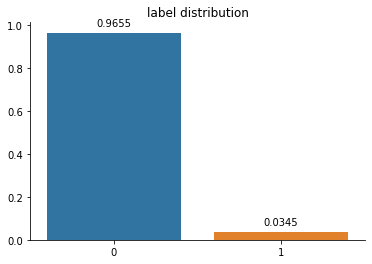

In [13]:
ax = sns.barplot(label_dist.index,label_dist.values);
sns.despine()
plt.title("label distribution")
for p in ax.patches:
    ax.annotate("{:.4f}".format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

CTR is ablout 3.5%

After looking at id columns closely, I discoverd 
1. some features are really ID, some  features are not
2. some id values are actully a feature to another higher level features.

With these two findings I constructed following feature map:

1. users:
    - uid
    - age 
    - city
        - city_rank
        - residence
    - career
    - gender
    - up_life_duration
    - up_membership_grade
    - membership_life_duration
    - consume_purchase
    - communication_onlinerate
    - communication_avgonline_30d
2. ads
    - task_id
    - adv_id
    - creat_type_cd
    - adv_prim_id
    - dev_id
    - inter_typ_cd
    - slot_id
    - indu_name
3. apps
    - spread_app_id
    - tags
    - app_first_class
    - app_second_class
    - his_app_size
    - his_on_shelf_time
    - app_score
4. device
    - device_name
    - device_size
    - emui_dev
    - list_time
    - device_price
6. behavior/event
    - net_type
    - pt_d
   
I will start explore features following this feature map

# User Features

In [23]:
def categorical_analysis(df, col,id_col):
    # value count
    value_counts = df[col].value_counts().sort_index()
    print(f"{col} value counts")
    print(value_counts)
    
    # value count plot
    plt.figure(figsize=(8,5))
    ax = value_counts.plot(kind="bar");
    sns.despine()
    plt.title(f"{col} category count",loc='center')
    plt.xlabel("category")
    plt.xticks(rotation=360)
    plt.ylabel("count")
    for p in ax.patches:
        ax.annotate(str(p.get_height()), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 5), 
                       textcoords = 'offset points')
    plt.show()
    
    # percentage plot
    plt.figure(figsize=(8,5))
    ax = (value_counts/df.shape[0]).sort_index().plot(kind="bar");
    sns.despine()
    plt.title(f"{col} category proportion",loc='center')
    plt.xlabel(f"{col} category")
    plt.xticks(rotation=360)
    plt.ylabel("percentage")
    for p in ax.patches:
        ax.annotate("{:.2f}".format(p.get_height()), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 5), 
                       textcoords = 'offset points')
    plt.show()
    
    #CTR
    plt.figure(figsize=(8,5))
    agg_df = train_df[[col,'label']].groupby(col).agg(['sum',"count",lambda x: x.sum()/x.count()])
    ax = agg_df['label']['<lambda_0>'].plot(kind='bar');
    sns.despine()
    plt.title(f"CTR in each {col} category")
    plt.xlabel(f'{col} category')
    plt.ylabel('CTR')
    plt.xticks(rotation=360)
    plt.hlines(0.035,ax.axes.get_xlim()[0],ax.axes.get_xlim()[1], linestyles='dashed', colors="r")
    for p in ax.patches:
        ax.annotate("{:.2f}".format(p.get_height()), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 5), 
                       textcoords = 'offset points')
    plt.show()
        
    # click or not click distribution
    plt.figure(figsize=(8,5))
    agg_df = train_df[[col,'label',id_col]].groupby([col,'label']).count().reset_index()
    agg_df = pd.merge(agg_df,agg_df.groupby("label").sum(),left_on='label',right_on=agg_df.groupby("label").sum().index)
    agg_df = agg_df.rename({f"{col}_x":col},axis=1)
    agg_df["pct"] = agg_df[f'{id_col}_x'] / agg_df[f'{id_col}_y']
    ax = sns.barplot(x=col, y="pct", hue="label", data=agg_df);
    sns.despine()
    plt.title(f"Click or Not Click {col} distribution")
    plt.xlabel(f'{col} category')
    plt.ylabel('percentage')
    ax.legend(loc='best')
    plt.xticks(rotation=360)
    for p in ax.patches:
        ax.annotate("{:.4f}".format(p.get_height()), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 5), 
                       textcoords = 'offset points')
    plt.show()
    
    # chi square
    agg_df = train_df[[col,'label',id_col]].groupby([col,'label']).count().reset_index()
    agg_df = pd.pivot_table(agg_df, values=id_col, index=col, columns='label')
    print(agg_df)
    if agg_df.isna().sum().sum() > 0 or (agg_df < 5).sum().sum() > 0:
        print("chi square test each cell has at least 5 data requirement not satisfied")
    chi2, p, dof, expect =  chi2_contingency(agg_df.fillna(0))
    print(f"{col} & label chi square test")
    print(f"p-value: {p}")
    print(f"can't reject H0, {col} is independent from label" if p > 0.05 else f"reject H0, {col} and label are dependent")

In [15]:
train_df['communication_onlinerate_start'] = train_df['communication_onlinerate'].str.split("^").str[0]
train_df['communication_onlinerate_end'] = train_df['communication_onlinerate'].str.split("^").str[-1]
train_df["comm_time"] = np.where(train_df['communication_onlinerate_start'] != "-1",
                          train_df['communication_onlinerate_end'].astype(int)\
                             - train_df['communication_onlinerate_start'].astype(int),
                          -1)

In [21]:
feature_map = {"uid": ["age",                 
         "city",
         "city_rank",
         "residence",
         "career",
         "gender",
         "up_life_duration",
         "up_membership_grade",
         "membership_life_duration",
         "consume_purchase",
         "communication_onlinerate_start",
         "communication_onlinerate_end",
         "comm_time",
         "communication_avgonline_30d",
         "net_type",
         "pt_d"
                ],
"task_id": ["creat_type_cd",
                "adv_prim_id",
                "dev_id",
                "inter_type_cd",
                "slot_id",
                "indu_name"],
"spread_app_id" :["tags",
                "app_first_class",
                "app_second_class",
                "his_app_size",
                "his_on_shelf_time",
                "app_score"],
"device_name":["device_size",
                   "emui_dev",
                   "list_time",
                   "device_price"]}

age EDA
age value counts
-1      1697
 1     16458
 2     19188
 3     24835
 4    130059
 5    184261
 6    156520
 7     94898
Name: age, dtype: int64


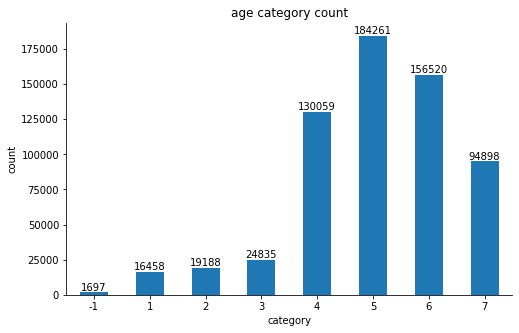

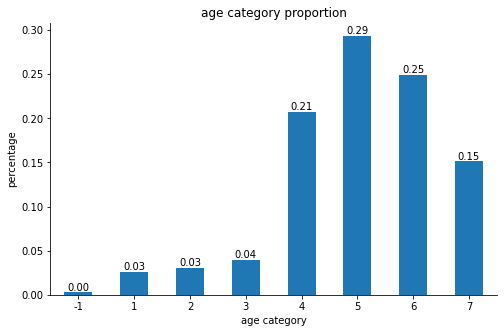

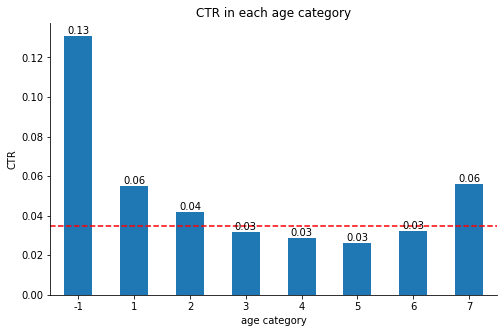

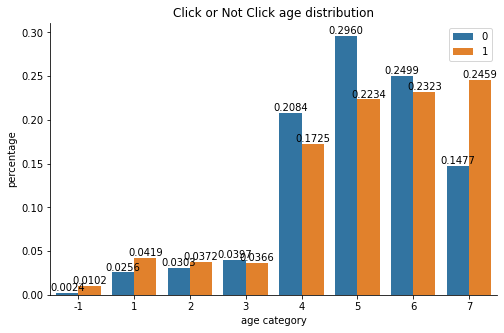

label       0     1
age                
-1       1475   222
 1      15550   908
 2      18382   806
 3      24041   794
 4     126320  3739
 5     179419  4842
 6     151486  5034
 7      89569  5329
age & label chi square test
p-value: 0.0
reject H0, age and label are dependent




city EDA
city value counts
101     958
102     864
103    3922
104    2104
105    3934
       ... 
440     279
441    4294
442      18
443    1097
444     970
Name: city, Length: 344, dtype: int64


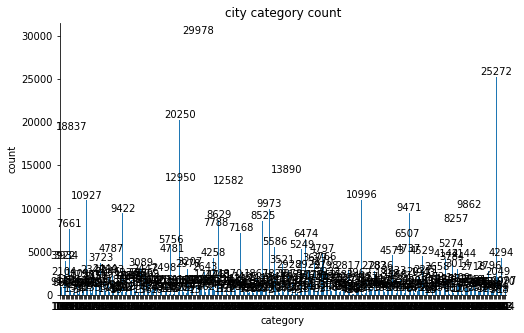

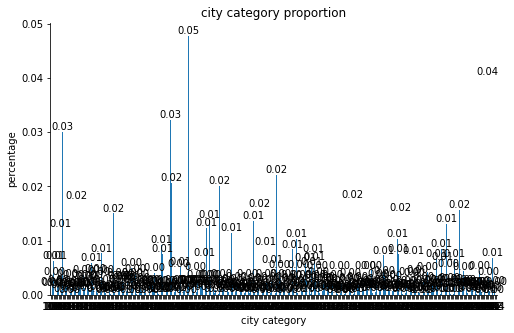

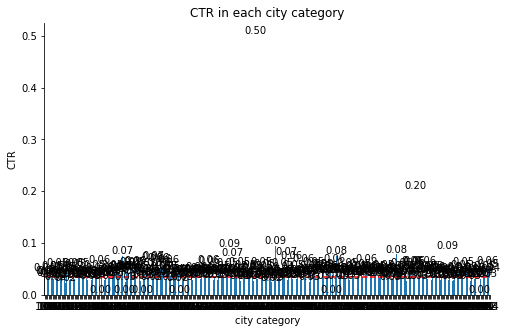

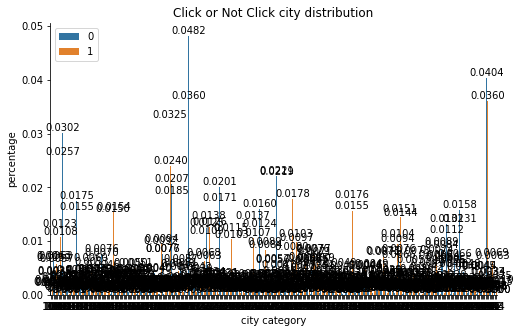

label       0      1
city                
101     918.0   40.0
102     832.0   32.0
103    3794.0  128.0
104    2028.0   76.0
105    3810.0  124.0
...       ...    ...
440     266.0   13.0
441    4158.0  136.0
442      17.0    1.0
443    1042.0   55.0
444     928.0   42.0

[344 rows x 2 columns]
chi square test each cell has at least 5 data requirement not satisfied
city & label chi square test
p-value: 3.262736160711276e-81
reject H0, city and label are dependent




city_rank EDA
city_rank value counts
2      5715
3    288793
4    116055
5    217353
Name: city_rank, dtype: int64


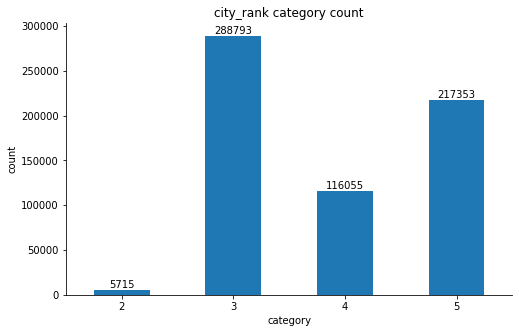

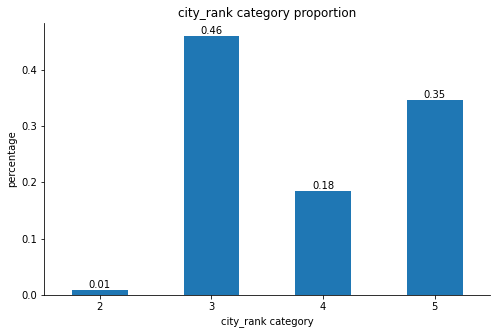

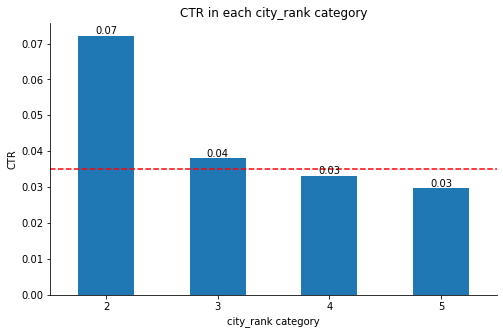

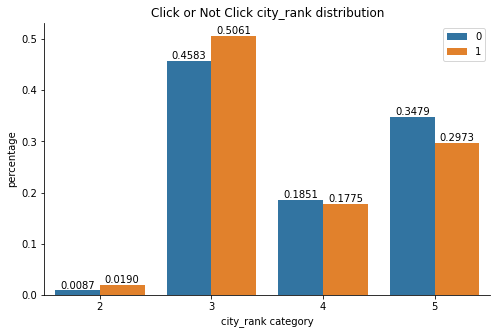

label           0      1
city_rank               
2            5303    412
3          277823  10970
4          112207   3848
5          210909   6444
city_rank & label chi square test
p-value: 1.1539906112395725e-109
reject H0, city_rank and label are dependent




residence EDA
residence value counts
11     1642
12    43283
13    14344
14    24891
15    18400
16     1224
17     1120
18    14046
19     9121
20    87648
21    30067
22        2
23    13890
24     6113
25       10
26     9471
27     7105
28    25272
29    19469
30     8729
31       15
32    29978
33     4189
34    56434
35    23182
36     1741
37    32421
38    10661
39    20547
40     5578
41    18544
42    27207
43     9191
44     2433
45    18396
46    31552
Name: residence, dtype: int64


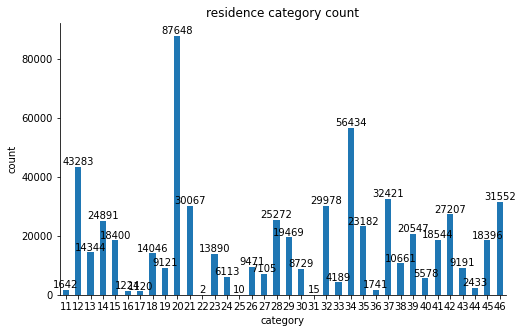

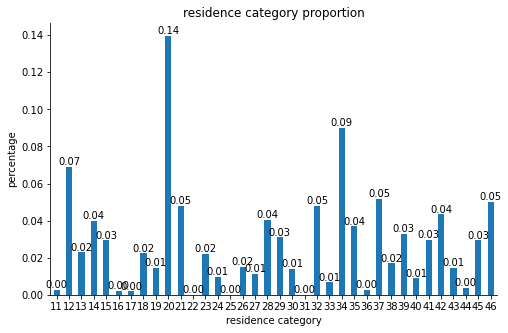

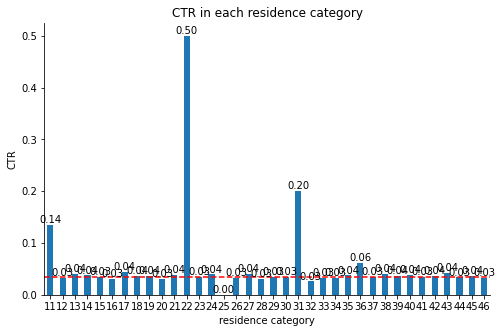

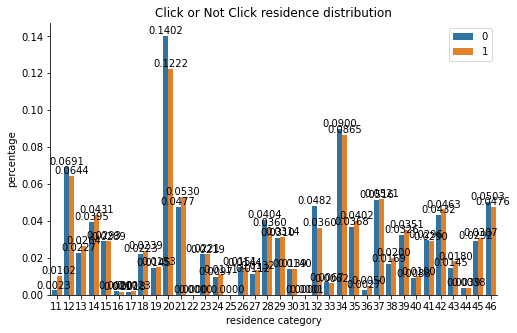

label            0       1
residence                 
11          1420.0   222.0
12         41888.0  1395.0
13         13772.0   572.0
14         23957.0   934.0
15         17774.0   626.0
16          1187.0    37.0
17          1070.0    50.0
18         13527.0   519.0
19          8790.0   331.0
20         84999.0  2649.0
21         28918.0  1149.0
22             1.0     1.0
23         13415.0   475.0
24          5873.0   240.0
25            10.0     NaN
26          9159.0   312.0
27          6818.0   287.0
28         24491.0   781.0
29         18788.0   681.0
30          8426.0   303.0
31            12.0     3.0
32         29197.0   781.0
33          4055.0   134.0
34         54559.0  1875.0
35         22311.0   871.0
36          1633.0   108.0
37         31292.0  1129.0
38         10228.0   433.0
39         19787.0   760.0
40          5362.0   216.0
41         17916.0   628.0
42         26204.0  1003.0
43          8800.0   391.0
44          2351.0    82.0
45         17731.0   665.0
4

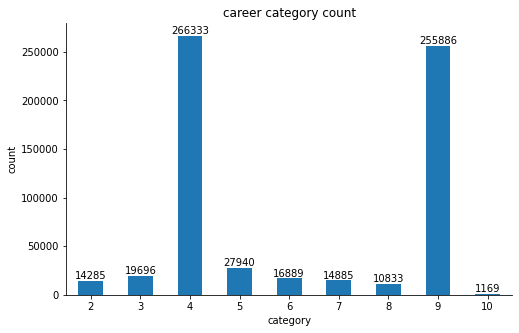

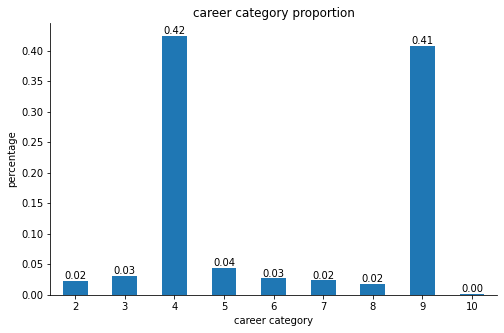

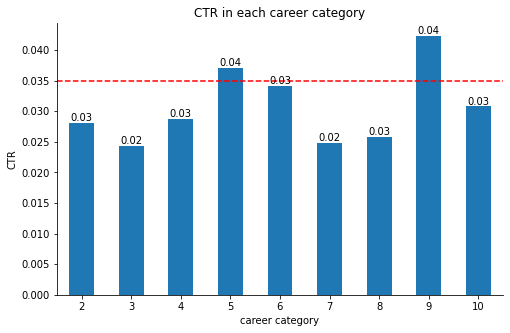

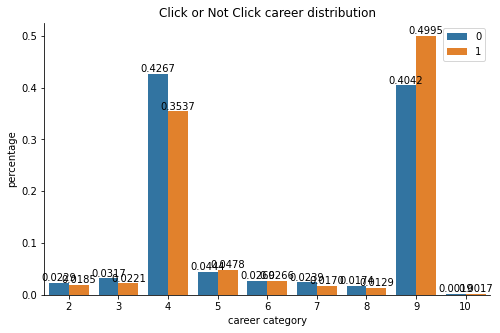

label        0      1
career               
2        13883    402
3        19216    480
4       258666   7667
5        26903   1037
6        16313    576
7        14516    369
8        10553    280
9       245059  10827
10        1133     36
career & label chi square test
p-value: 1.1124086936218693e-184
reject H0, career and label are dependent




gender EDA
gender value counts
2    482186
3      7808
4    137922
Name: gender, dtype: int64


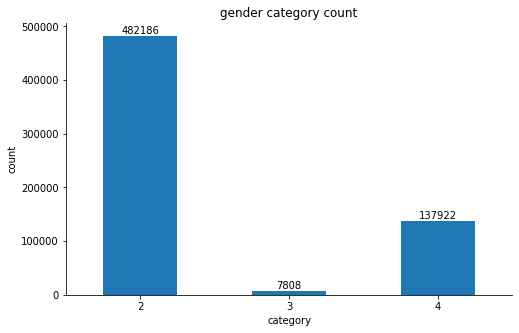

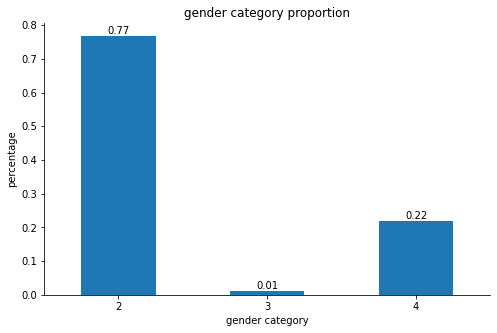

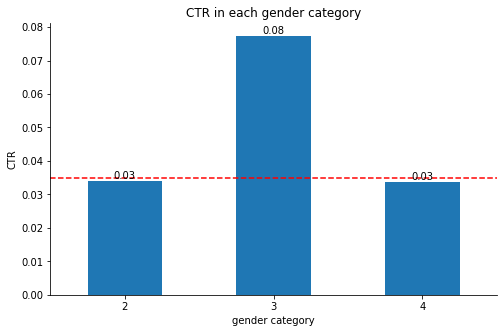

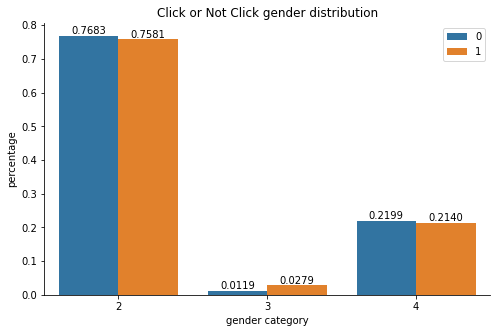

label        0      1
gender               
2       465754  16432
3         7204    604
4       133284   4638
gender & label chi square test
p-value: 2.0667376481608428e-95
reject H0, gender and label are dependent




up_life_duration EDA
up_life_duration value counts
-1     179980
 1        658
 2        733
 3        724
 4        817
 5        836
 6        849
 7        852
 8        827
 9       6493
 10       873
 11      4730
 12      6701
 13       804
 14     23455
 15       787
 16     21031
 17       552
 18    143283
 19       326
 20    232605
Name: up_life_duration, dtype: int64


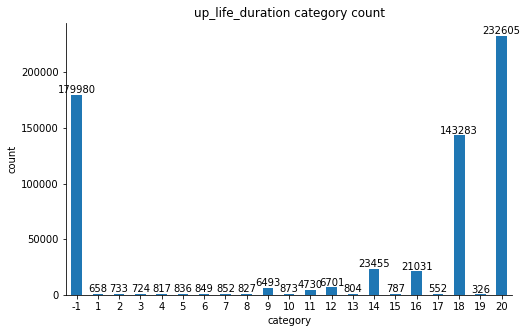

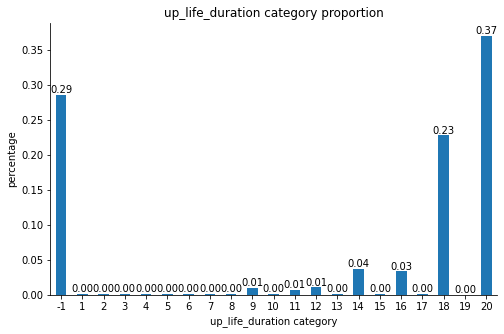

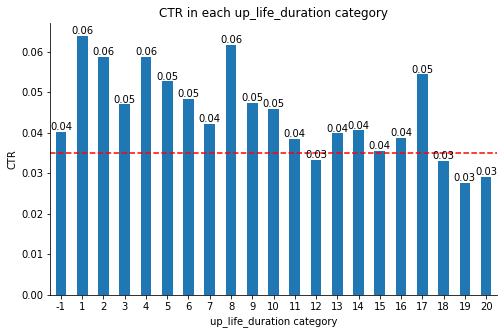

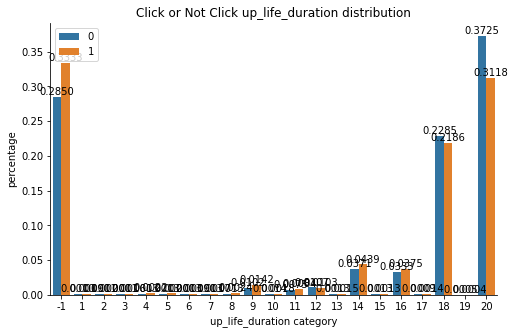

label                  0     1
up_life_duration              
-1                172756  7224
 1                   616    42
 2                   690    43
 3                   690    34
 4                   769    48
 5                   792    44
 6                   808    41
 7                   816    36
 8                   776    51
 9                  6186   307
 10                  833    40
 11                 4548   182
 12                 6478   223
 13                  772    32
 14                22504   951
 15                  759    28
 16                20218   813
 17                  522    30
 18               138546  4737
 19                  317     9
 20               225846  6759
up_life_duration & label chi square test
p-value: 9.952868832261606e-104
reject H0, up_life_duration and label are dependent




up_membership_grade EDA
up_membership_grade value counts
-1    551766
 1     75477
 2       492
 3       181
Name: up_membership_grade, dtype: int64


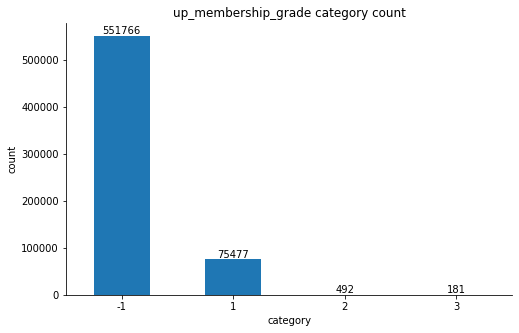

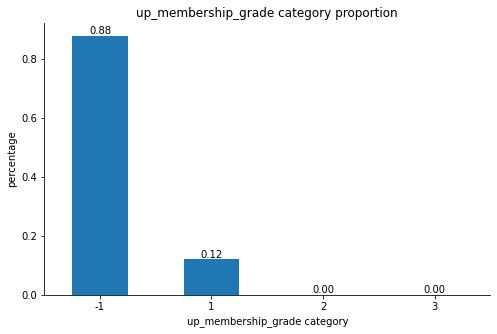

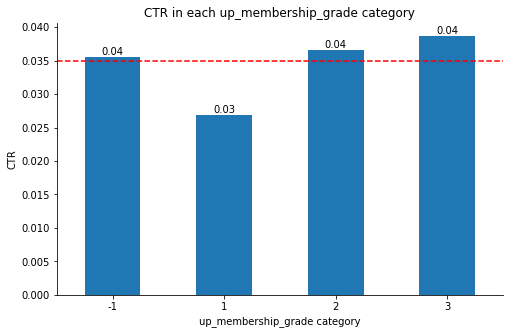

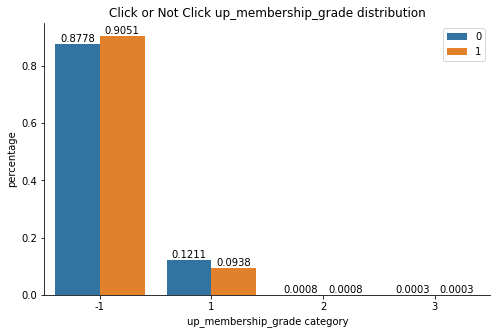

label                     0      1
up_membership_grade               
-1                   532149  19617
 1                    73445   2032
 2                      474     18
 3                      174      7
up_membership_grade & label chi square test
p-value: 5.358094524157847e-32
reject H0, up_membership_grade and label are dependent




membership_life_duration EDA
membership_life_duration value counts
-1     626914
 4          1
 9          1
 11         3
 14        24
 15         3
 16        82
 17         1
 18       878
 19         3
 20         6
Name: membership_life_duration, dtype: int64


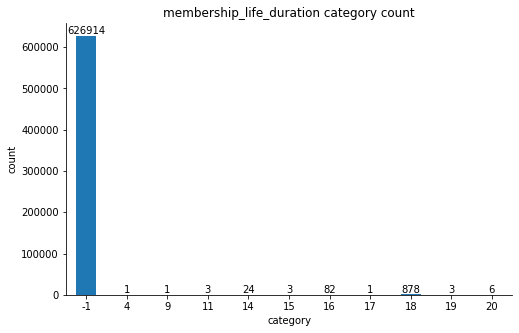

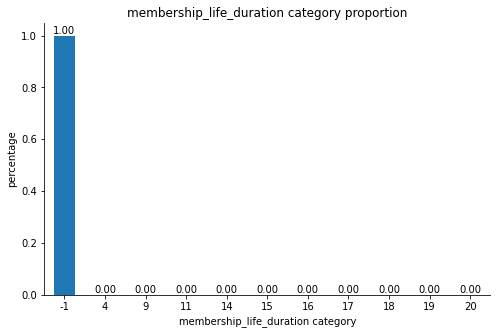

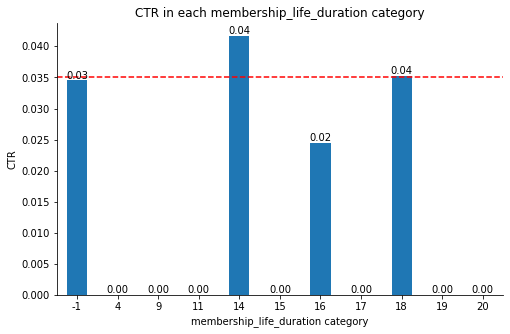

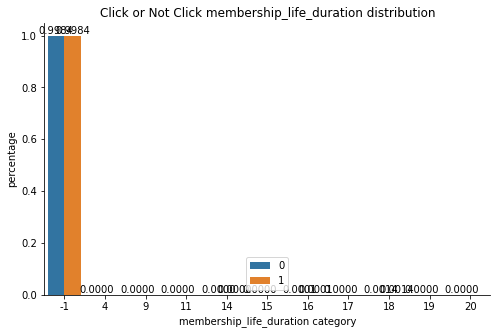

label                            0        1
membership_life_duration                   
-1                        605274.0  21640.0
 4                             1.0      NaN
 9                             1.0      NaN
 11                            3.0      NaN
 14                           23.0      1.0
 15                            3.0      NaN
 16                           80.0      2.0
 17                            1.0      NaN
 18                          847.0     31.0
 19                            3.0      NaN
 20                            6.0      NaN
chi square test each cell has at least 5 data requirement not satisfied
membership_life_duration & label chi square test
p-value: 0.99986461050213
can't reject H0, membership_life_duration is independent from label




consume_purchase EDA
consume_purchase value counts
2     549830
3       5833
4        629
5      35287
6       1012
7       7026
8       4275
9       1737
10     22287
Name: consume_purchase, dtype: int64


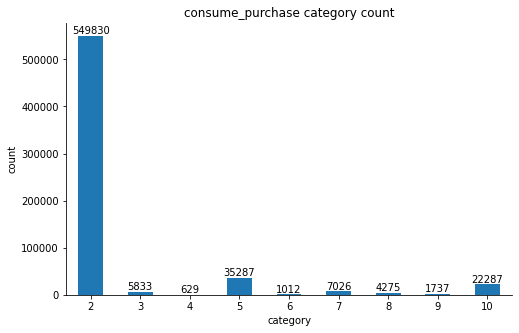

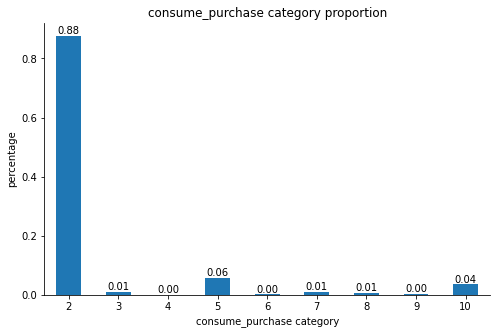

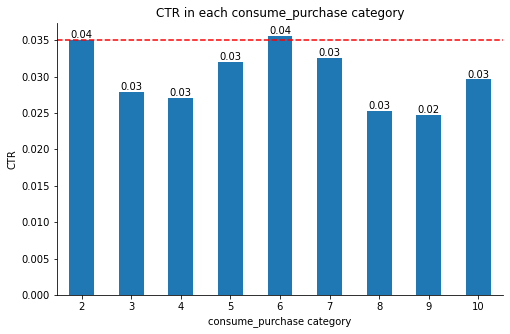

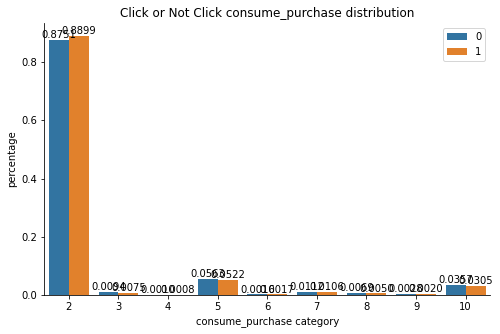

label                  0      1
consume_purchase               
2                 530543  19287
3                   5670    163
4                    612     17
5                  34156   1131
6                    976     36
7                   6797    229
8                   4167    108
9                   1694     43
10                 21627    660
consume_purchase & label chi square test
p-value: 1.0335611925689743e-08
reject H0, consume_purchase and label are dependent




communication_onlinerate_start EDA
communication_onlinerate_start value counts
-1      6047
0     164303
1      59088
10      4498
11      2779
12      1854
13      1275
14       958
15       821
16       758
17       693
18       596
19       524
2      48883
20       407
21       230
22       145
23       108
3      28842
4      29401
5      62134
6     115223
7      62701
8      26282
9       9366
Name: communication_onlinerate_start, dtype: int64


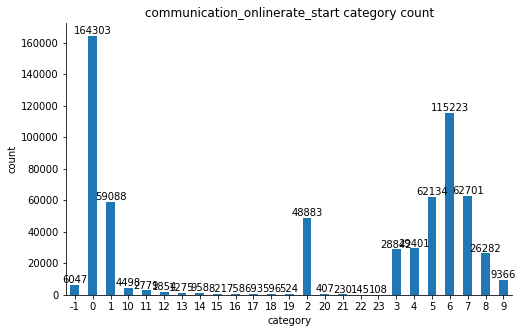

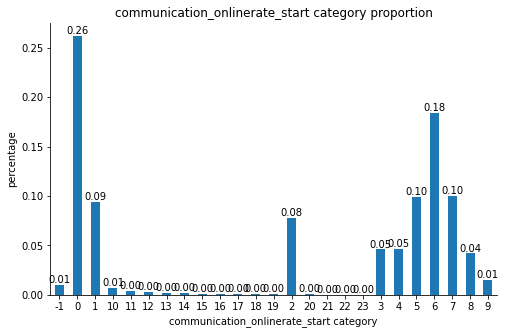

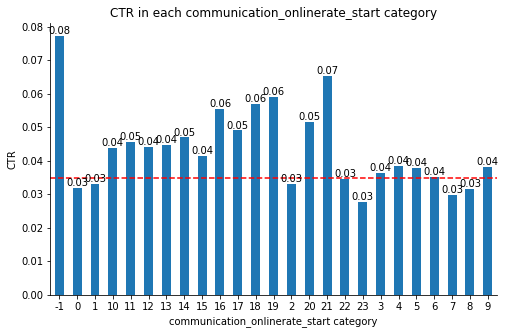

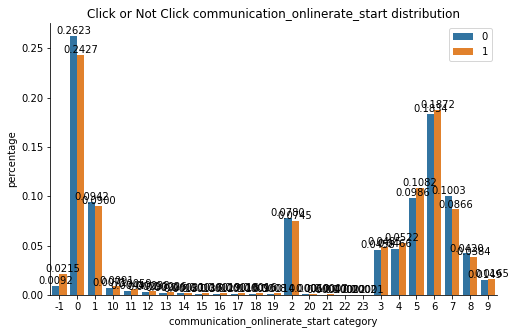

label                                0     1
communication_onlinerate_start              
-1                                5580   467
0                               159042  5261
1                                57138  1950
10                                4301   197
11                                2652   127
12                                1772    82
13                                1218    57
14                                 913    45
15                                 787    34
16                                 716    42
17                                 659    34
18                                 562    34
19                                 493    31
2                                47268  1615
20                                 386    21
21                                 215    15
22                                 140     5
23                                 105     3
3                                27791  1051
4                                28269  1132
5         

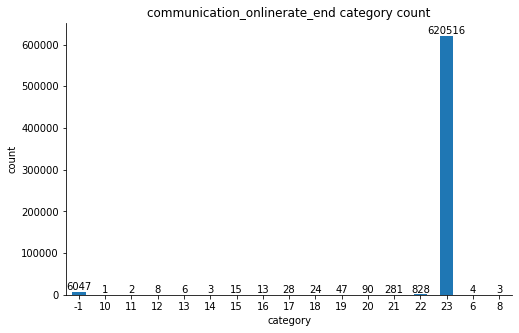

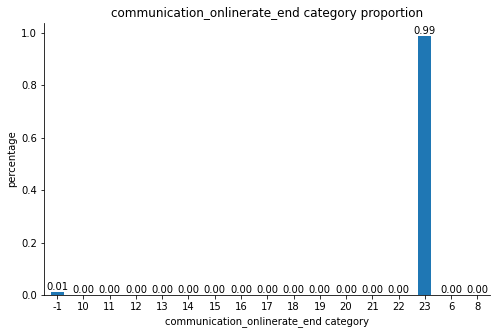

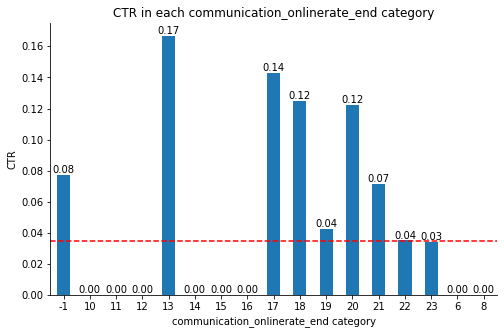

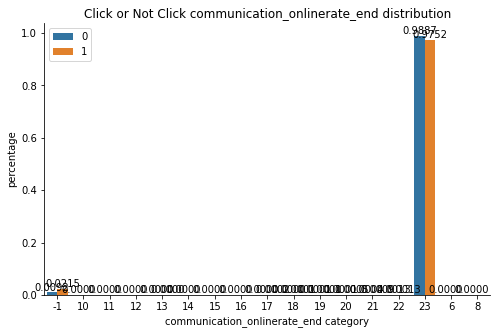

label                                0        1
communication_onlinerate_end                   
-1                              5580.0    467.0
10                                 1.0      NaN
11                                 2.0      NaN
12                                 8.0      NaN
13                                 5.0      1.0
14                                 3.0      NaN
15                                15.0      NaN
16                                13.0      NaN
17                                24.0      4.0
18                                21.0      3.0
19                                45.0      2.0
20                                79.0     11.0
21                               261.0     20.0
22                               799.0     29.0
23                            599379.0  21137.0
6                                  4.0      NaN
8                                  3.0      NaN
chi square test each cell has at least 5 data requirement not satisfied
communication_on

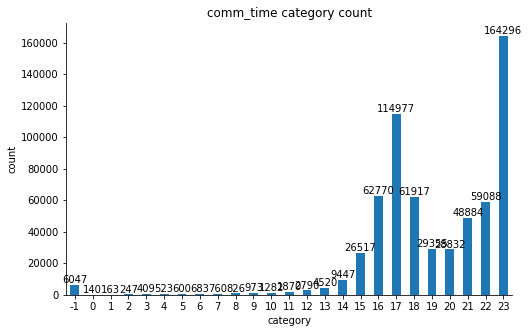

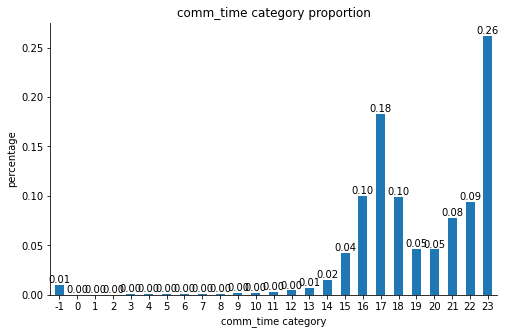

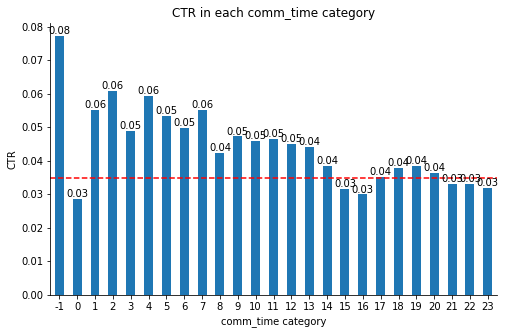

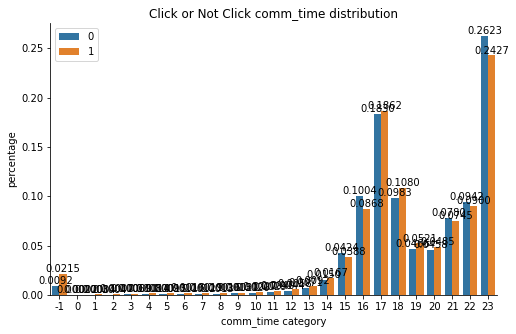

label           0     1
comm_time              
-1           5580   467
 0            136     4
 1            154     9
 2            232    15
 3            389    20
 4            492    31
 5            568    32
 6            649    34
 7            718    42
 8            791    35
 9            927    46
 10          1223    59
 11          1783    87
 12          2664   126
 13          4320   200
 14          9084   363
 15         25677   840
 16         60889  1881
 17        110941  4036
 18         59576  2341
 19         28226  1129
 20         27780  1052
 21         47269  1615
 22         57138  1950
 23        159036  5260
chi square test each cell has at least 5 data requirement not satisfied
comm_time & label chi square test
p-value: 1.0094962084569619e-98
reject H0, comm_time and label are dependent




communication_avgonline_30d EDA
communication_avgonline_30d value counts
-1       2009
 1        187
 2        282
 3        876
 4       1506
 5       2296
 6      

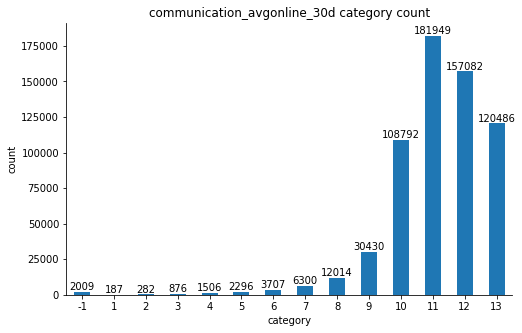

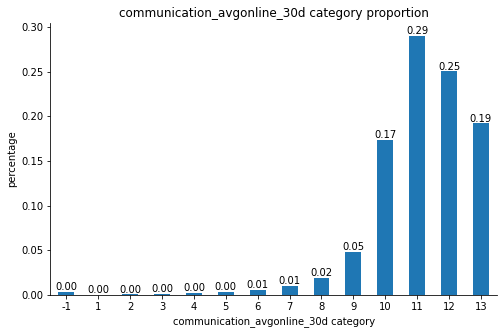

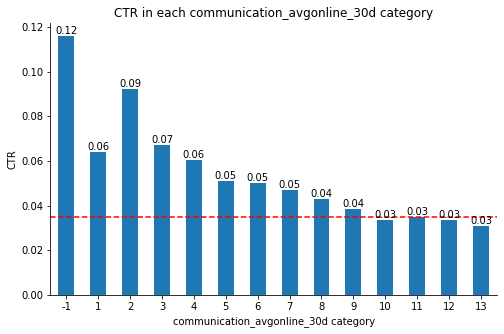

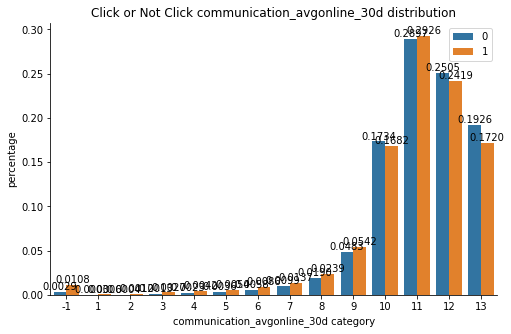

label                             0     1
communication_avgonline_30d              
-1                             1776   233
 1                              175    12
 2                              256    26
 3                              817    59
 4                             1415    91
 5                             2179   117
 6                             3521   186
 7                             6003   297
 8                            11496   518
 9                            29255  1175
 10                          105146  3646
 11                          175607  6342
 12                          151838  5244
 13                          116758  3728
communication_avgonline_30d & label chi square test
p-value: 6.337197473127923e-134
reject H0, communication_avgonline_30d and label are dependent




net_type EDA
net_type value counts
2    499139
3    125744
4      2430
5       527
6        76
Name: net_type, dtype: int64


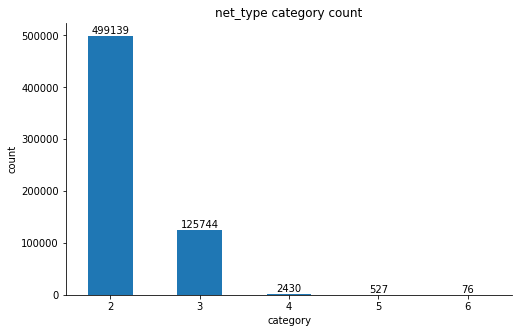

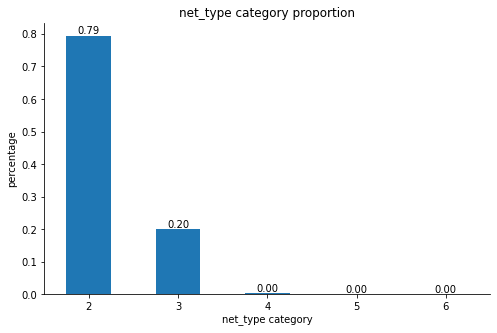

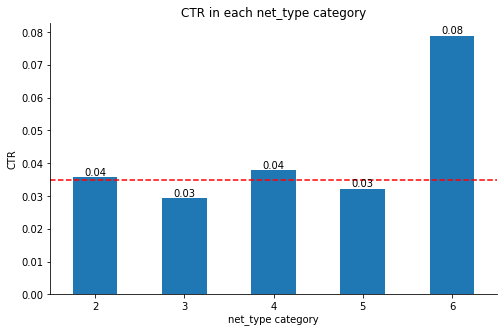

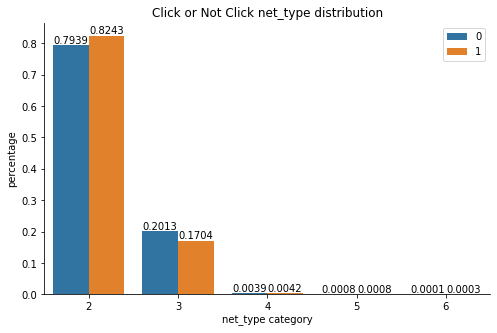

label          0      1
net_type               
2         481273  17866
3         122051   3693
4           2338     92
5            510     17
6             70      6
net_type & label chi square test
p-value: 4.3051126294902185e-27
reject H0, net_type and label are dependent




pt_d EDA
pt_d value counts
1    94105
2    86298
3    90670
4    88409
5    88157
6    90079
7    90198
Name: pt_d, dtype: int64


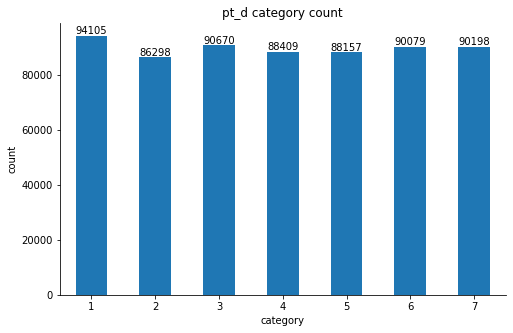

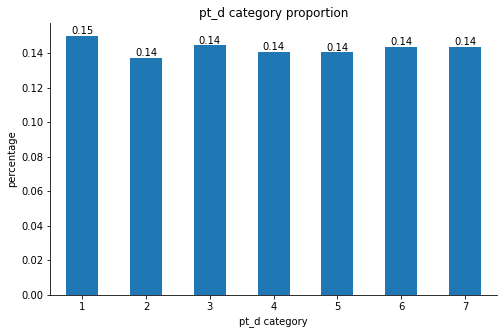

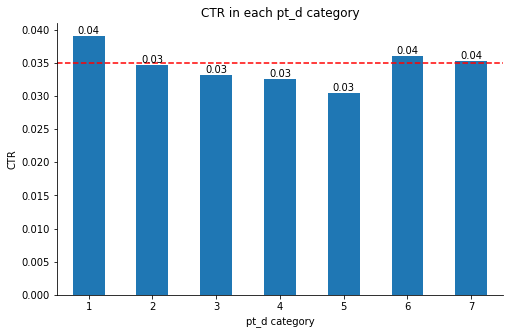

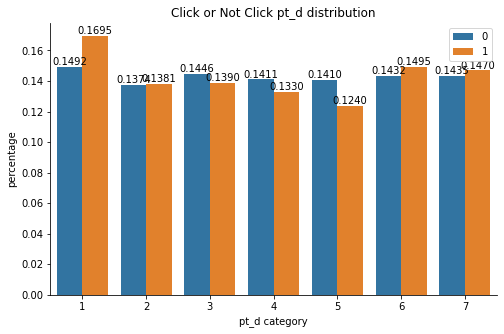

label      0     1
pt_d              
1      90432  3673
2      83305  2993
3      87657  3013
4      85526  2883
5      85470  2687
6      86839  3240
7      87013  3185
pt_d & label chi square test
p-value: 5.41519841104169e-24
reject H0, pt_d and label are dependent




creat_type_cd EDA
creat_type_cd value counts
2      4476
3     45299
4     11714
5     10222
6     94323
7    431556
8     27902
9      2424
Name: creat_type_cd, dtype: int64


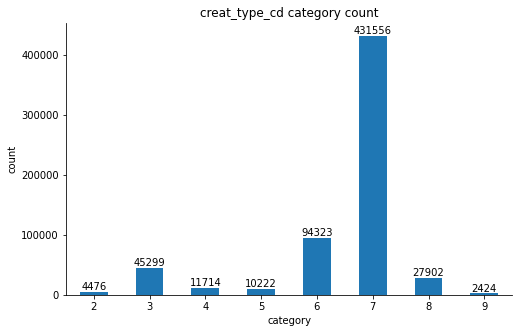

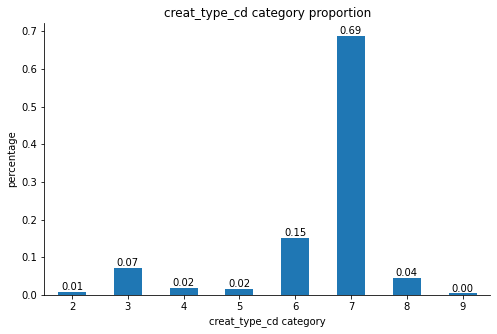

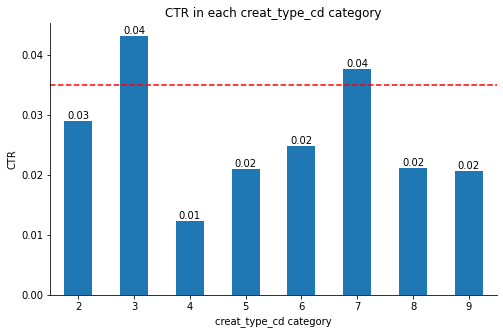

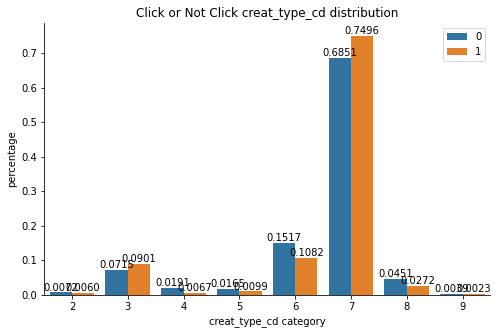

label               0      1
creat_type_cd               
2                4346    130
3               43346   1953
4               11569    145
5               10007    215
6               91978   2345
7              415309  16247
8               27313    589
9                2374     50
creat_type_cd & label chi square test
p-value: 2.0356183063574228e-187
reject H0, creat_type_cd and label are dependent




adv_prim_id EDA
adv_prim_id value counts
101       70
102     2292
103      104
104    11706
105      519
       ...  
209     2999
210    12175
212      214
213     1071
214     1678
Name: adv_prim_id, Length: 101, dtype: int64


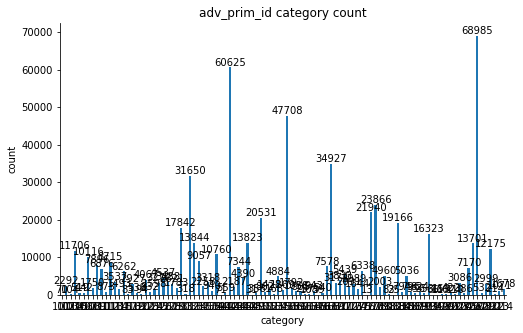

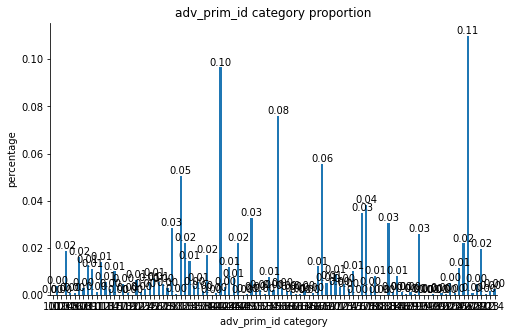

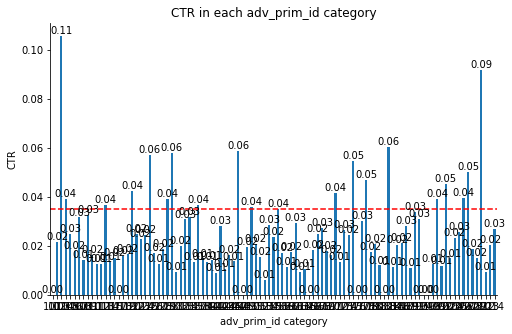

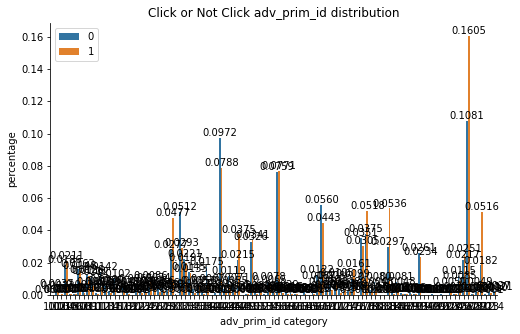

label              0       1
adv_prim_id                 
101             70.0     NaN
102           2242.0    50.0
103             93.0    11.0
104          11249.0   457.0
105            506.0    13.0
...              ...     ...
209           2954.0    45.0
210          11057.0  1118.0
212            212.0     2.0
213           1049.0    22.0
214           1633.0    45.0

[101 rows x 2 columns]
chi square test each cell has at least 5 data requirement not satisfied
adv_prim_id & label chi square test
p-value: 0.0
reject H0, adv_prim_id and label are dependent




dev_id EDA
dev_id value counts
11       324
12      3415
13      1587
14       214
15     12345
16      2173
17    106116
18      4422
19      4752
20      1792
22       123
23        25
24       815
26      1716
27      5439
29     35068
30     17019
32       134
33       796
34        75
35       332
36     50387
37     91876
38      5072
39      1676
40       690
41        82
42        92
43      3932
46      3938
47    

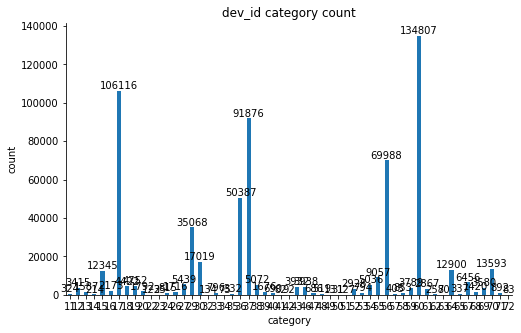

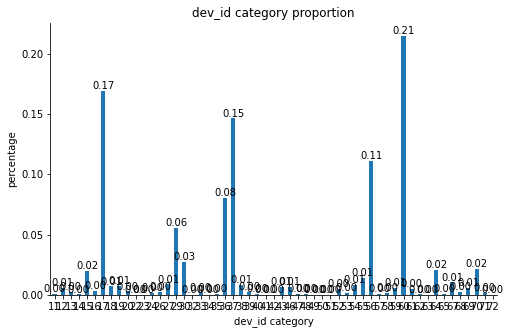

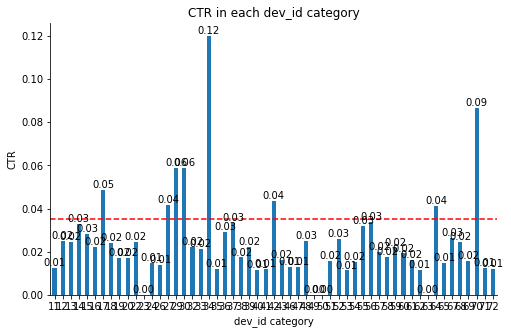

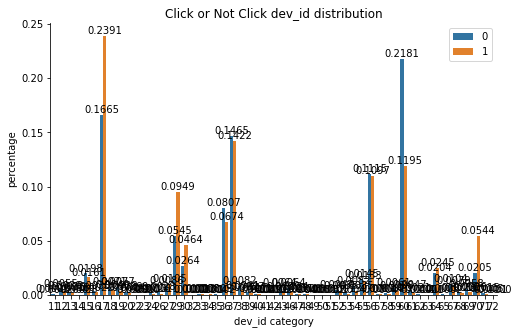

label          0       1
dev_id                  
11         320.0     4.0
12        3330.0    85.0
13        1548.0    39.0
14         207.0     7.0
15       11995.0   350.0
16        2125.0    48.0
17      100934.0  5182.0
18        4316.0   106.0
19        4670.0    82.0
20        1761.0    31.0
22         120.0     3.0
23          25.0     NaN
24         803.0    12.0
26        1692.0    24.0
27        5212.0   227.0
29       33011.0  2057.0
30       16014.0  1005.0
32         131.0     3.0
33         779.0    17.0
34          66.0     9.0
35         328.0     4.0
36       48926.0  1461.0
37       88794.0  3082.0
38        4984.0    88.0
39        1639.0    37.0
40         682.0     8.0
41          81.0     1.0
42          88.0     4.0
43        3869.0    63.0
46        3887.0    51.0
47         677.0     9.0
48         506.0    13.0
49          13.0     NaN
50          31.0     NaN
51         125.0     2.0
52        2852.0    76.0
53         785.0     9.0
54        4960.0    76.0


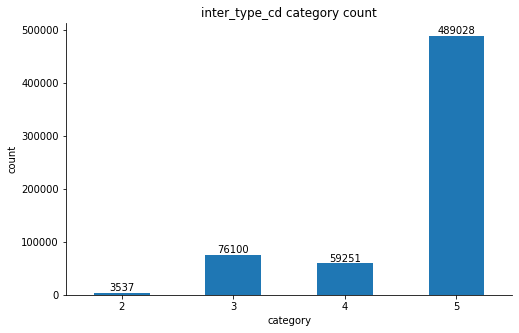

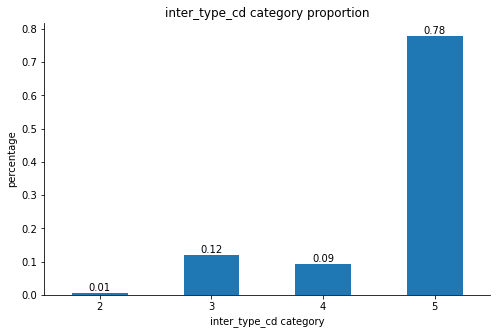

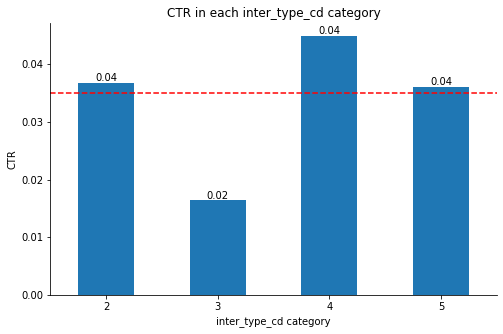

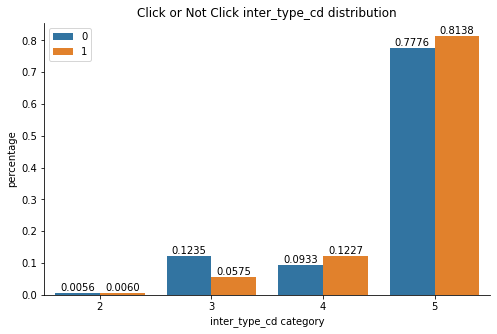

label               0      1
inter_type_cd               
2                3407    130
3               74854   1246
4               56591   2660
5              471390  17638
inter_type_cd & label chi square test
p-value: 6.548087908062288e-212
reject H0, inter_type_cd and label are dependent




slot_id EDA
slot_id value counts
11     62680
12    136313
13     46231
14     38014
15     16631
16     70636
17    125058
18     44052
19     20978
20      1074
21     53992
22     12257
Name: slot_id, dtype: int64


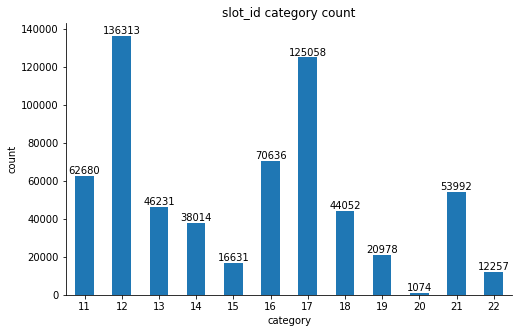

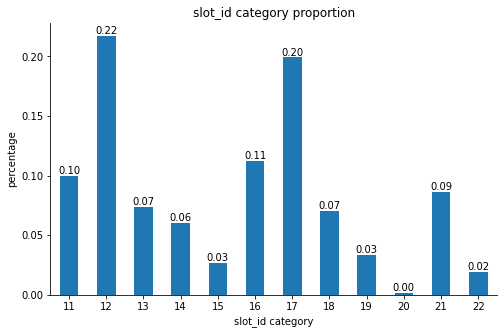

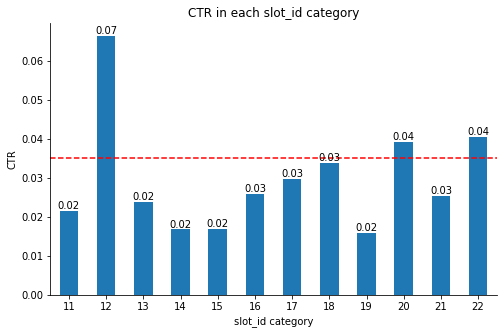

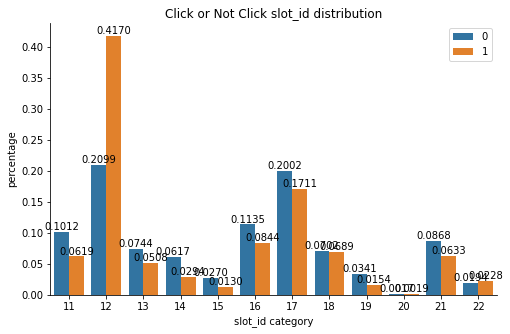

label         0     1
slot_id              
11        61338  1342
12       127274  9039
13        45130  1101
14        37377   637
15        16350   281
16        68807  1829
17       121349  3709
18        42558  1494
19        20644   334
20         1032    42
21        52621  1371
22        11762   495
slot_id & label chi square test
p-value: 0.0
reject H0, slot_id and label are dependent




indu_name EDA
indu_name value counts
11      2474
12      1716
13      1358
14     15652
15        87
16      4376
17    266781
18      7184
19        92
20      1333
21      1591
22      3042
23       102
24     52375
25      5602
26      6960
27     21500
29      2029
30      6326
31       332
32      6382
33      7419
34      2514
36     85290
37      1785
38     12273
39      1835
40      3097
41        11
42     57608
45        83
46      4537
47     31650
48       134
49       289
50      4910
51      6462
52       725
Name: indu_name, dtype: int64


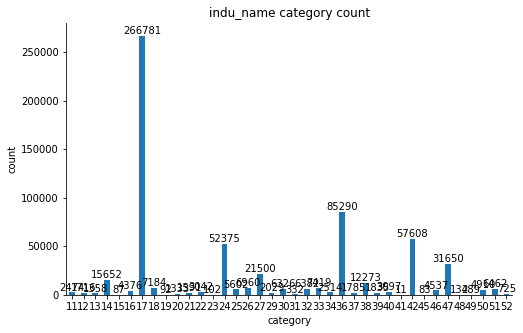

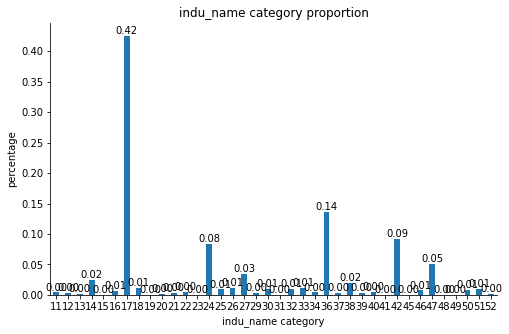

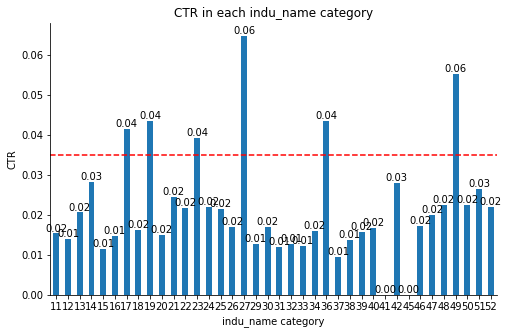

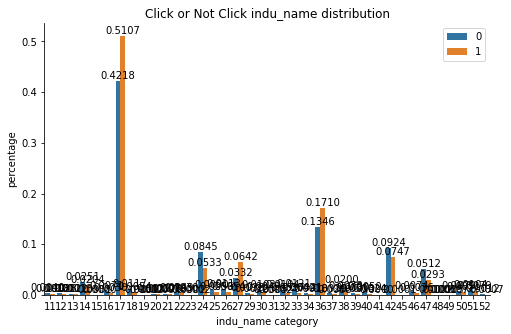

label             0        1
indu_name                   
11           2436.0     38.0
12           1692.0     24.0
13           1330.0     28.0
14          15210.0    442.0
15             86.0      1.0
16           4311.0     65.0
17         255712.0  11069.0
18           7068.0    116.0
19             88.0      4.0
20           1313.0     20.0
21           1552.0     39.0
22           2976.0     66.0
23             98.0      4.0
24          51219.0   1156.0
25           5481.0    121.0
26           6842.0    118.0
27          20108.0   1392.0
29           2003.0     26.0
30           6219.0    107.0
31            328.0      4.0
32           6301.0     81.0
33           7328.0     91.0
34           2474.0     40.0
36          81584.0   3706.0
37           1768.0     17.0
38          12103.0    170.0
39           1806.0     29.0
40           3045.0     52.0
41             11.0      NaN
42          55989.0   1619.0
45             83.0      NaN
46           4459.0     78.0
47          31

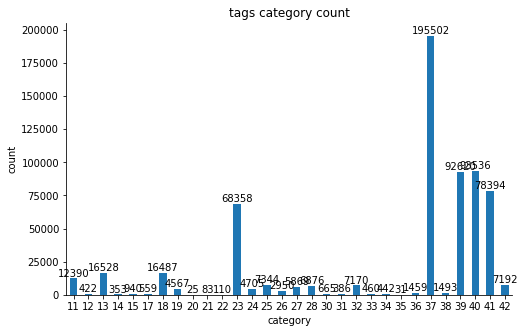

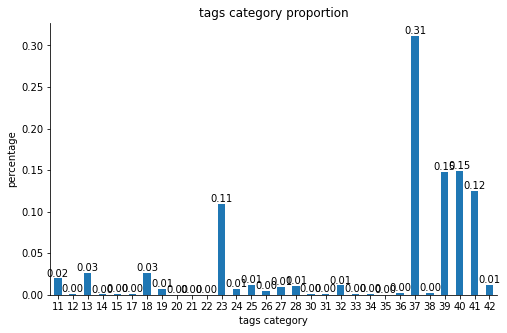

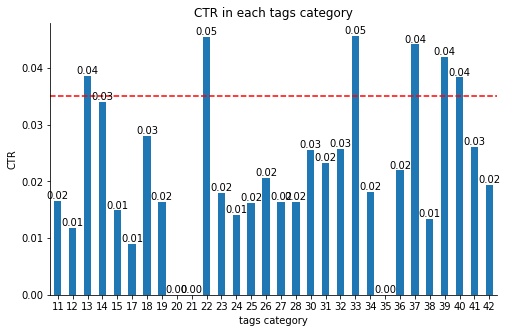

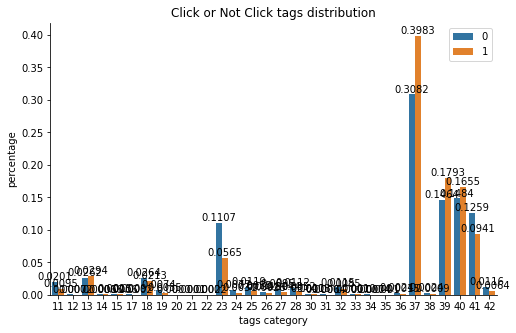

label         0       1
tags                   
11      12185.0   205.0
12        417.0     5.0
13      15890.0   638.0
14        341.0    12.0
15        926.0    14.0
17        554.0     5.0
18      16026.0   461.0
19       4492.0    75.0
20         25.0     NaN
21         83.0     NaN
22        105.0     5.0
23      67134.0  1224.0
24       4639.0    66.0
25       7225.0   119.0
26       2889.0    61.0
27       5773.0    96.0
28       6763.0   113.0
30        648.0    17.0
31        377.0     9.0
32       6986.0   184.0
33        439.0    21.0
34        434.0     8.0
35         31.0     NaN
36       1427.0    32.0
37     186870.0  8632.0
38       1473.0    20.0
39      88733.0  3887.0
40      89950.0  3586.0
41      76354.0  2040.0
42       7053.0   139.0
chi square test each cell has at least 5 data requirement not satisfied
tags & label chi square test
p-value: 0.0
reject H0, tags and label are dependent




app_first_class EDA
app_first_class value counts
2    134807
3      3477
4

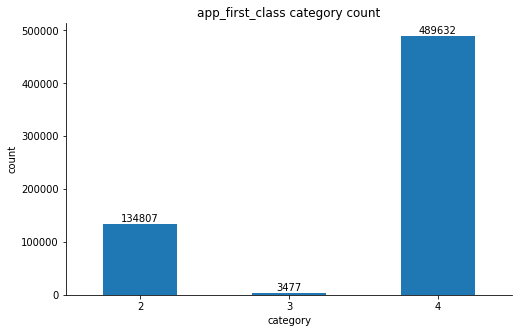

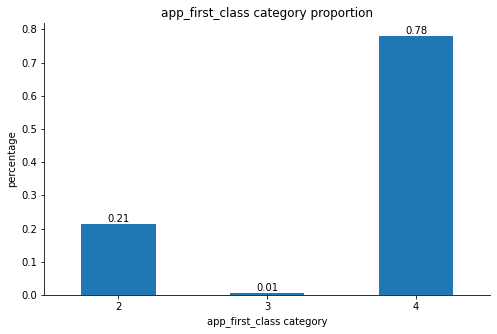

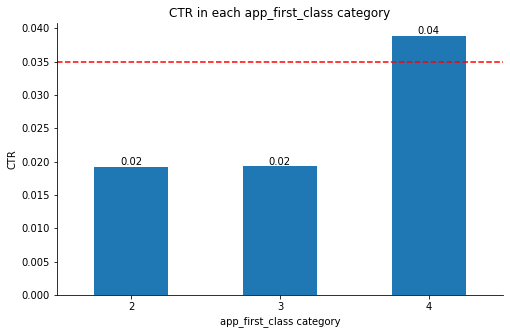

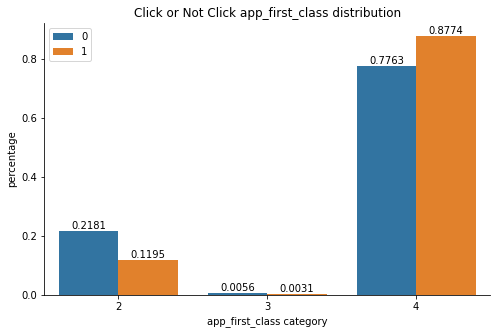

label                 0      1
app_first_class               
2                132217   2590
3                  3410     67
4                470615  19017
app_first_class & label chi square test
p-value: 2.4510719681924675e-271
reject H0, app_first_class and label are dependent




app_second_class EDA
app_second_class value counts
11      3656
12      4989
13      5869
14       386
15      1842
16      1518
17     99843
18       735
19       110
20     12390
21    200207
22      4492
23     65108
24       353
25    110064
26     78477
27      6876
28      7344
29     23657
Name: app_second_class, dtype: int64


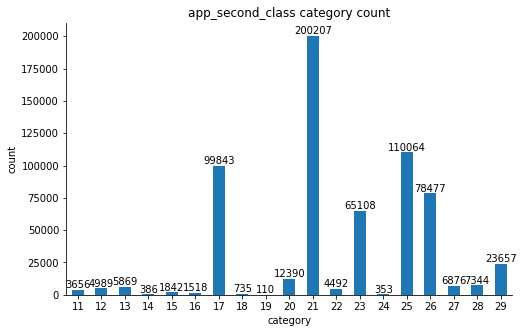

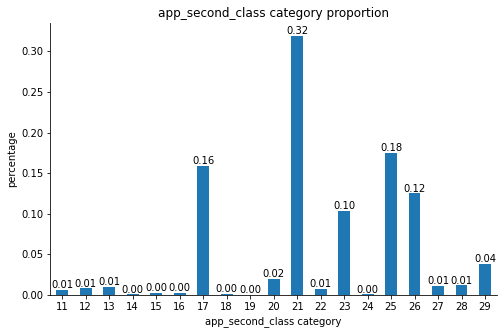

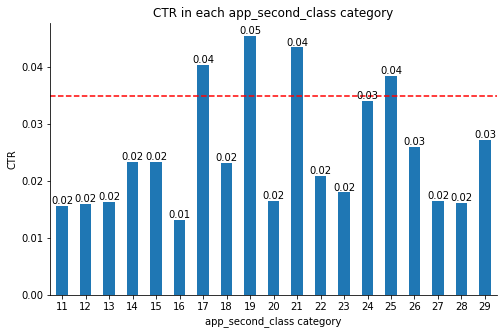

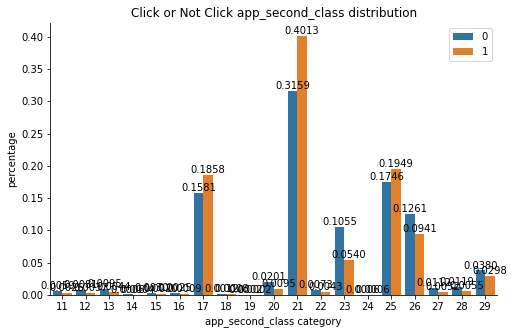

label                  0     1
app_second_class              
11                  3599    57
12                  4909    80
13                  5773    96
14                   377     9
15                  1799    43
16                  1498    20
17                 95817  4026
18                   718    17
19                   105     5
20                 12185   205
21                191509  8698
22                  4398    94
23                 63937  1171
24                   341    12
25                105840  4224
26                 76437  2040
27                  6763   113
28                  7225   119
29                 23012   645
app_second_class & label chi square test
p-value: 0.0
reject H0, app_second_class and label are dependent




his_app_size EDA
his_app_size value counts
-1     134807
 2      21290
 3        794
 4     114473
 5      50844
 6      77391
 7       2176
 8       8597
 9      49334
 10       405
 11     10786
 12       809
 13     28910
 14     60336


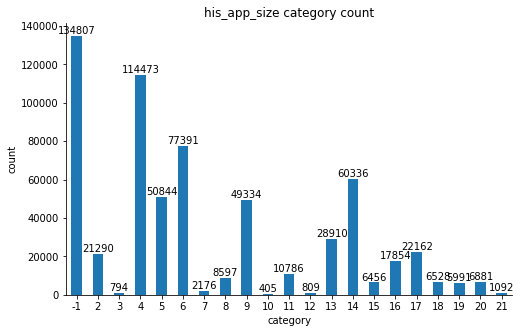

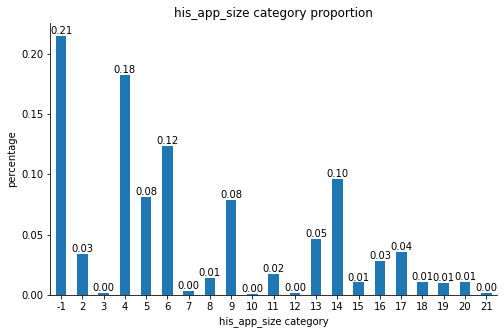

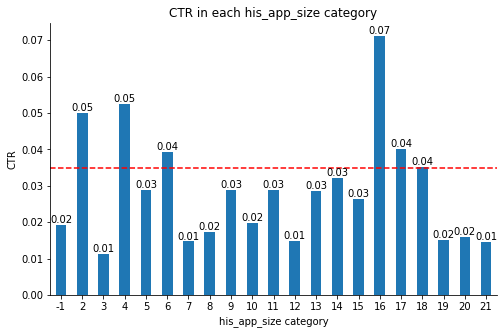

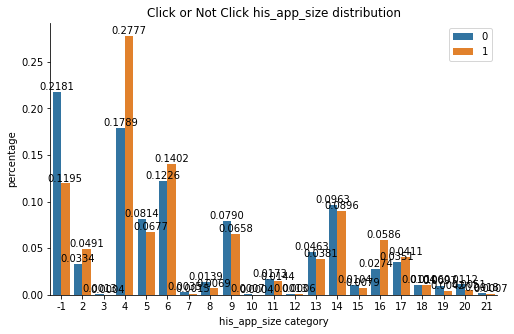

label              0     1
his_app_size              
-1            132217  2590
 2             20226  1064
 3               785     9
 4            108455  6018
 5             49376  1468
 6             74353  3038
 7              2144    32
 8              8448   149
 9             47907  1427
 10              397     8
 11            10474   312
 12              797    12
 13            28084   826
 14            58394  1942
 15             6285   171
 16            16583  1271
 17            21272   890
 18             6298   230
 19             5900    91
 20             6771   110
 21             1076    16
his_app_size & label chi square test
p-value: 0.0
reject H0, his_app_size and label are dependent




his_on_shelf_time EDA
his_on_shelf_time value counts
-1    134807
 1        70
 2     65035
 3    428004
Name: his_on_shelf_time, dtype: int64


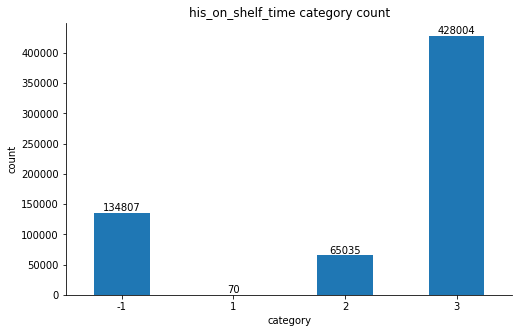

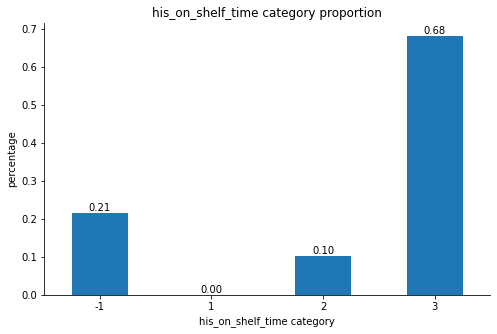

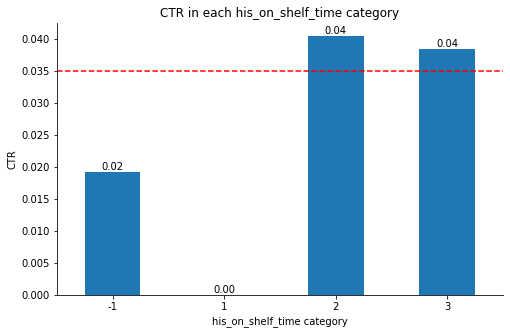

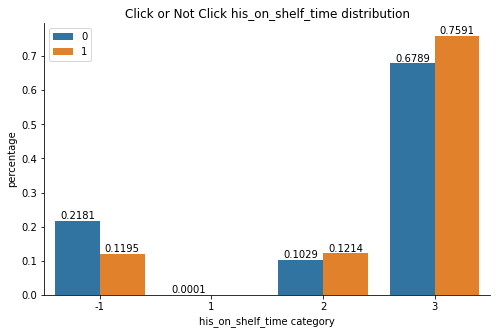

label                     0        1
his_on_shelf_time                   
-1                 132217.0   2590.0
 1                     70.0      NaN
 2                  62404.0   2631.0
 3                 411551.0  16453.0
chi square test each cell has at least 5 data requirement not satisfied
his_on_shelf_time & label chi square test
p-value: 1.8813512445763337e-263
reject H0, his_on_shelf_time and label are dependent




app_score EDA
app_score value counts
1    135139
2    492777
Name: app_score, dtype: int64


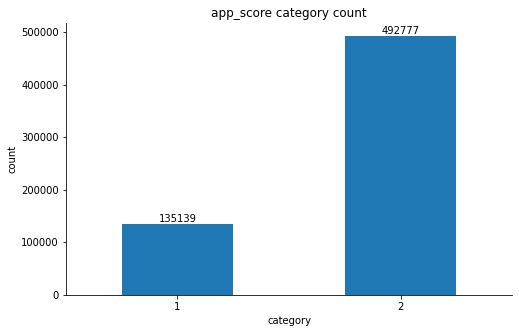

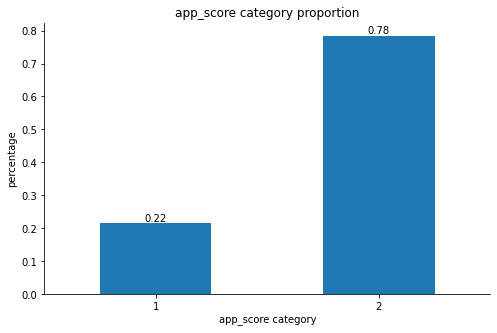

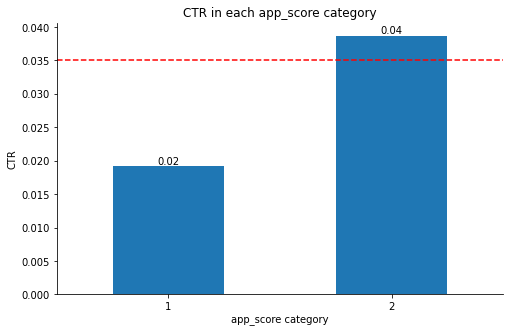

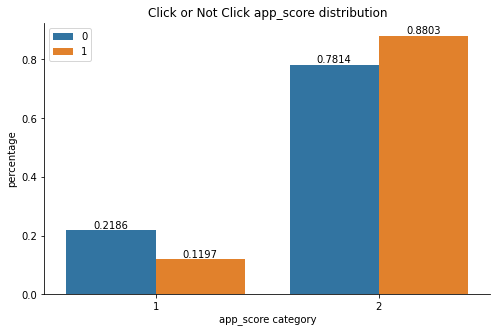

label           0      1
app_score               
1          132545   2594
2          473697  19080
app_score & label chi square test
p-value: 1.1608068884086074e-265
reject H0, app_score and label are dependent




device_size EDA
device_size value counts
102       1
103    1801
104     211
105       9
109      13
       ... 
343      14
344       1
346      17
348      16
349     127
Name: device_size, Length: 134, dtype: int64


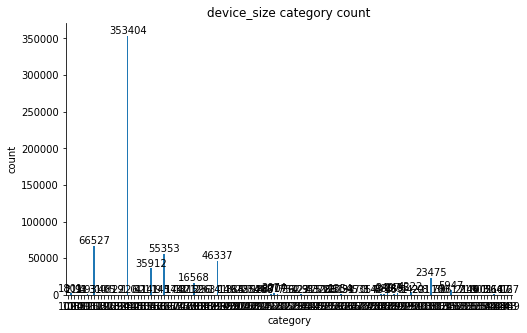

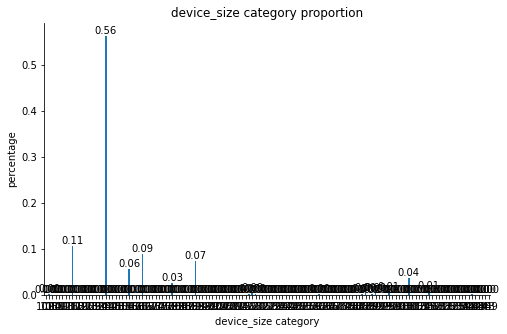

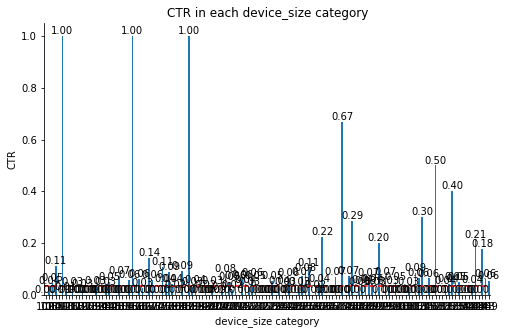

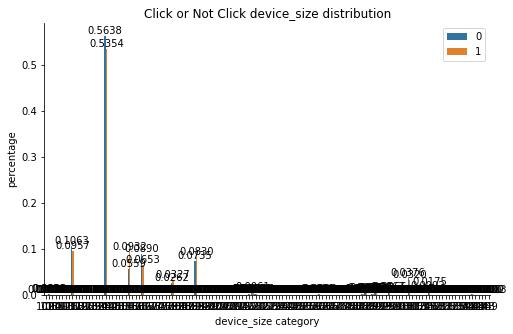

label             0     1
device_size              
102             1.0   NaN
103          1736.0  65.0
104           201.0  10.0
105             8.0   1.0
109            13.0   NaN
...             ...   ...
343            11.0   3.0
344             1.0   NaN
346            14.0   3.0
348            15.0   1.0
349           120.0   7.0

[134 rows x 2 columns]
chi square test each cell has at least 5 data requirement not satisfied
device_size & label chi square test
p-value: 1.984067605156246e-196
reject H0, device_size and label are dependent




emui_dev EDA
emui_dev value counts
11       276
12     51151
14    118397
15      1471
16      1349
17     14155
18       672
19     13054
20    324318
21         5
23         4
24       536
25      6847
26      5483
27     47955
28     42243
Name: emui_dev, dtype: int64


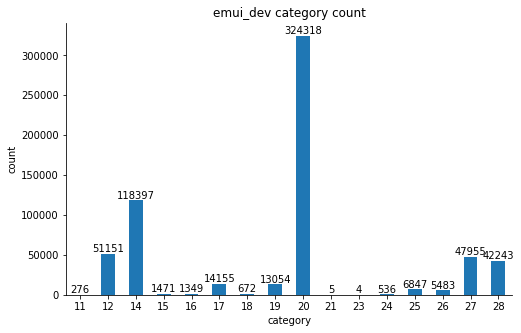

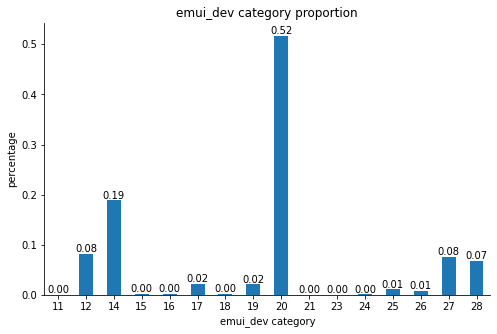

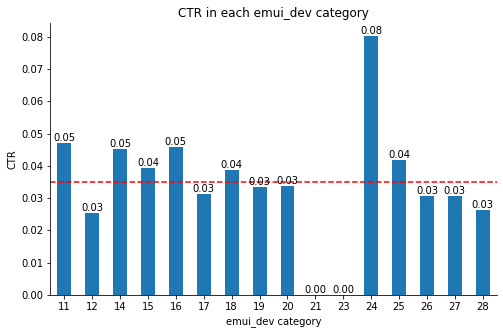

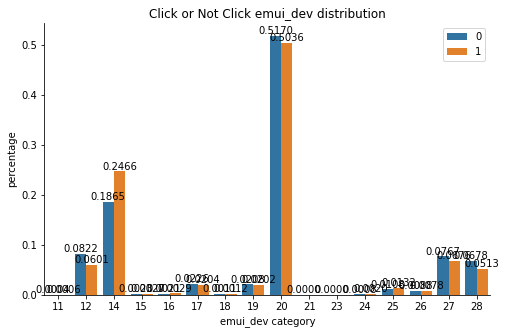

label            0        1
emui_dev                   
11           263.0     13.0
12         49849.0   1302.0
14        113053.0   5344.0
15          1413.0     58.0
16          1287.0     62.0
17         13712.0    443.0
18           646.0     26.0
19         12617.0    437.0
20        313403.0  10915.0
21             5.0      NaN
23             4.0      NaN
24           493.0     43.0
25          6561.0    286.0
26          5315.0    168.0
27         46489.0   1466.0
28         41132.0   1111.0
chi square test each cell has at least 5 data requirement not satisfied
emui_dev & label chi square test
p-value: 7.008383575205563e-140
reject H0, emui_dev and label are dependent




list_time EDA
list_time value counts
-2        273
-1       1697
 4      93992
 5      42220
 6       6784
 7      32121
 8      96345
 9     109334
 10     45733
 11      1511
 12     65337
 13     24066
 14     62975
 15     20600
 16      5468
 17     19460
Name: list_time, dtype: int64


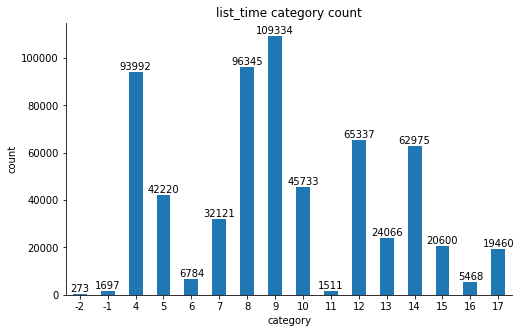

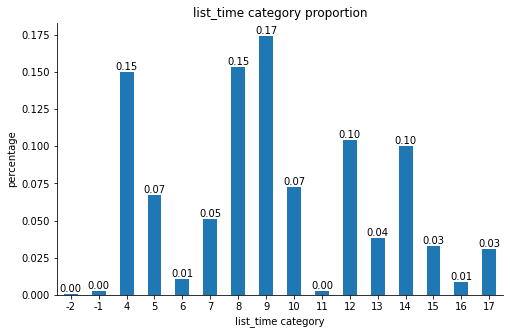

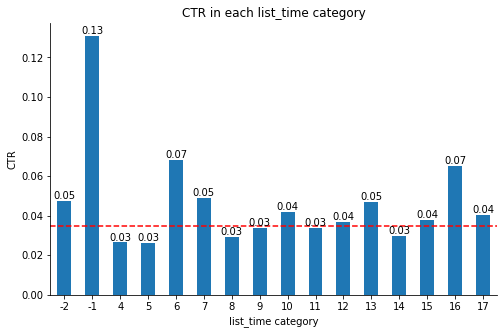

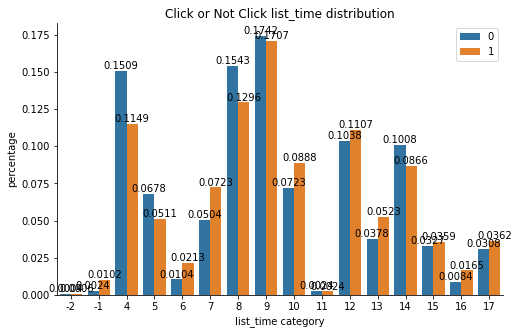

label           0     1
list_time              
-2            260    13
-1           1475   222
 4          91502  2490
 5          41112  1108
 6           6322   462
 7          30553  1568
 8          93537  2808
 9         105635  3699
 10         43809  1924
 11          1460    51
 12         62937  2400
 13         22932  1134
 14         61099  1876
 15         19822   778
 16          5111   357
 17         18676   784
list_time & label chi square test
p-value: 0.0
reject H0, list_time and label are dependent




device_price EDA
device_price value counts
-1      1697
 1     29006
 2    112617
 3    134882
 4    224125
 5    125316
 7       273
Name: device_price, dtype: int64


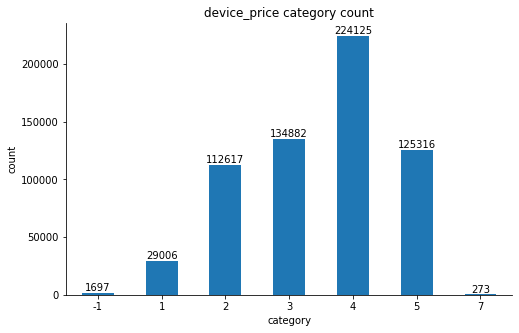

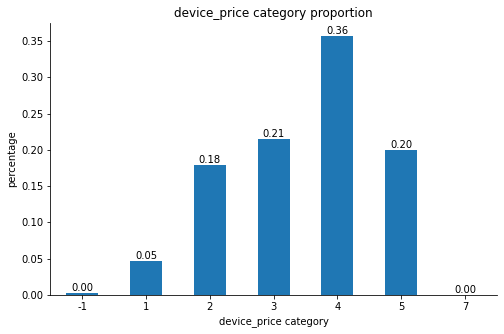

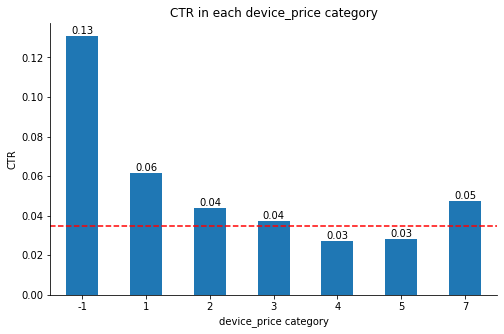

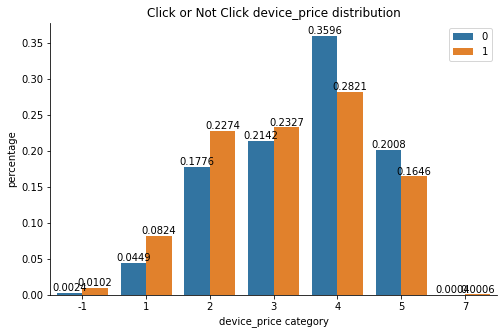

label              0     1
device_price              
-1              1475   222
 1             27220  1786
 2            107689  4928
 3            129839  5043
 4            218011  6114
 5            121748  3568
 7               260    13
device_price & label chi square test
p-value: 0.0
reject H0, device_price and label are dependent






In [24]:
for id_col in feature_map:
    for feature in feature_map[id_col]:
        print(f"{feature} EDA")
        categorical_analysis(train_df, feature, id_col)
        print("="*80)
        print("\n"*3)

## Most features are dependent to each other

In [18]:
from itertools import combinations
from functools import reduce

In [19]:
for pair in combinations(reduce(lambda x,y:x+y,feature_map.values()) + ['label'],2):
    agg_df = train_df[[pair[0],pair[1],'uid']].groupby([pair[0],pair[1]]).count().reset_index()
    agg_df = pd.pivot_table(agg_df, values='uid', index=pair[0], columns=pair[1])
    print(agg_df)
    chi2, p, dof, expect =  chi2_contingency(agg_df.fillna(0))
    if p >= 0.05:
        print(pair)
        print(f"p-value: {p}")
        print(f"can't reject H0, {pair[0]} is independent from {pair[1]}" if p > 0.05 else f"reject H0, {pair[0]} and {pair[1]} are dependent")
    print("="*80)
    print("\n"*2)

city    101    102     103    104     105    106    107     108    109  \
age                                                                      
-1      NaN    NaN     NaN    NaN     NaN    NaN    NaN     NaN    NaN   
 1     22.0   26.0   119.0   41.0    75.0   25.0   35.0   176.0   10.0   
 2     42.0   23.0    85.0   42.0    74.0   56.0   46.0   270.0   24.0   
 3     40.0   92.0   102.0   99.0   137.0   29.0   57.0   528.0   19.0   
 4    171.0  160.0   513.0  489.0  1005.0  230.0  212.0  1968.0   72.0   
 5    270.0  220.0  1303.0  629.0  1300.0  196.0  280.0  2115.0  142.0   
 6    254.0  234.0   984.0  547.0   956.0  174.0  340.0  1667.0  161.0   
 7    159.0  109.0   816.0  257.0   387.0  146.0  188.0   937.0   99.0   

city     110   111    112    113    114   115   116    117    118    119  \
age                                                                        
-1       NaN   NaN    NaN    NaN    NaN   NaN   NaN    NaN    NaN    NaN   
 1     406.0   4.0   17.0   61.

To do 